## Exploratory Data Analysis

Loading all the data we have and merging it into one DataFrame for further analysis.

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import os
from functools import reduce

def read_and_merge_all_data(data_dir="data/out/"):
    """
    Read all CSV files from data/out/ directory and merge them on YEAR and COUNTRYCODE
    """
    # Get all CSV files in the directory
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    print(csv_files)
    
    if not csv_files:
        print(f"No CSV files found in {data_dir}")
        return pd.DataFrame()
    
    dataframes = []
    
    for file in csv_files:
        file_path = os.path.join(data_dir, file)
        try:
            df = pd.read_csv(file_path)
            print(f"Loaded {file}: {df.shape}")
            
            # Check if the required columns exist
            if 'YEAR' in df.columns and 'COUNTRYCODE' in df.columns:
                dataframes.append(df)
            else:
                print(f"Warning: {file} doesn't have YEAR and COUNTRYCODE columns, skipping...")
                
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    if not dataframes:
        print("No valid dataframes to merge")
        return pd.DataFrame()
    
    # Merge all dataframes
    print("Merging all dataframes...")
    merged_df = reduce(lambda left, right: pd.merge(left, right, on=['YEAR', 'COUNTRYCODE'], how='outer'), dataframes)
    
    print(f"Final merged dataframe shape: {merged_df.shape}")
    return merged_df

# Use the function
SELECTED_COUNTRIES = ["USA", "GBR"] #, "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

merged_df = read_and_merge_all_data()
merged_df

['all_clio_data.csv', 'all_clio_data_pt2.csv', 'md_data.csv', 'nobel_laureates.csv', 'owd-armed-forces-personnel.csv', 'owd_armed_forces_percent_population.csv', 'owd_education_government_expenditure_gdp.csv', 'owd_education_tertiary_completion_rate.csv', 'owd_exported_goods_as_share_of_gdp.csv', 'owd_exported_goods_gdp_share.csv', 'owd_military-spending.csv', 'owd_military_spending_as_share_of_gdp.csv', 'wipo_patents.csv']
Loaded all_clio_data.csv: (98757, 42)
Loaded all_clio_data_pt2.csv: (41657, 16)
Loaded md_data.csv: (45264, 5)
Loaded nobel_laureates.csv: (647, 3)
Loaded owd-armed-forces-personnel.csv: (5824, 3)
Loaded owd_armed_forces_percent_population.csv: (5602, 3)
Loaded owd_education_government_expenditure_gdp.csv: (5381, 3)
Loaded owd_education_tertiary_completion_rate.csv: (4311, 3)
Loaded owd_exported_goods_as_share_of_gdp.csv: (13808, 3)
Loaded owd_exported_goods_gdp_share.csv: (13101, 3)
Loaded owd_military-spending.csv: (15547, 3)
Loaded owd_military_spending_as_share_

COUNTRYCODE  YEAR  ARMEDCONFLICTSINTERNAL  ARMEDCONFLICTSINTERNATIONAL  \
0              ABW     1                     NaN                          NaN   
1              AFG     1                     NaN                          NaN   
2              AGO     1                     NaN                          NaN   
3              AIA     1                     NaN                          NaN   
4              ALB     1                     NaN                          NaN   
...            ...   ...                     ...                          ...   
112828         VNM  2040                     NaN                          NaN   
112829         YEM  2040                     NaN                          NaN   
112830         ZAF  2040                     NaN                          NaN   
112831         ZMB  2040                     NaN                          NaN   
112832         ZWE  2040                     NaN                          NaN   

        AVERAGEYEARSOFEDUCATION  BOOKTITLESPERCAPITA  \
0                           NaN                  NaN   
1                           NaN                  NaN   
2                           NaN                  NaN   
3                           NaN                  NaN   
4                           NaN                  NaN   
...                         ...                  ...   
112828                      NaN                  NaN   
112829                      NaN                  NaN   
112830                      NaN                  NaN   
112831                      NaN                  NaN   
112832                      NaN                  NaN   

        COMPETITIVENESSOFEXECUTIVERECRUITMENTXRCOMP  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
112828                                          NaN   
112829                                          NaN   
112830                                          NaN   
112831                                          NaN   
112832                                          NaN   

        COMPETITIVENESSOFPARTICIPATIONSPARCOMP  COMPOSITEMEASUREOFWELLBEING  \
0                                          NaN                          NaN   
1                                          NaN                          NaN   
2                                          NaN                          NaN   
3                                          NaN                          NaN   
4                                          NaN                          NaN   
...                                        ...                          ...   
112828                                     NaN                          NaN   
112829                                     NaN                          NaN   
112830                                     NaN                          NaN   
112831                                     NaN                          NaN   
112832                                     NaN                          NaN   

        EXCHANGERATESTOUKPOUND  ...  MILITARYPERSONNELPERCENT  \
0                          NaN  ...                       NaN   
1                          NaN  ...                       NaN   
2                          NaN  ...                       NaN   
3                          NaN  ...                       NaN   
4                          NaN  ...                       NaN   
...                        ...  ...                       ...   
112828                     NaN  ...                       NaN   
112829                     NaN  ...                       NaN   
112830                     NaN  ...                       NaN   
112831                     NaN  ...                       NaN   
112832                     NaN  ... 

In [3]:
# SELECTED_COUNTRIES = ["USA", "GBR"] #, "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

# df_tertiary = pd.read_csv("data/out/owd_education_tertiary_completion_rate.csv")
# df_gpd_edu = pd.read_csv("data/out/owd_education_government_expenditure_gdp.csv")
# df_nobel = pd.read_csv("data/out/nobel_laureates.csv")
# df_patents = pd.read_csv("data/out/wipo_patents.csv")
# df_clio = pd.read_csv("data/out/all_clio_data.csv")
# df_clio = pd.read_csv("data/out/all_clio_data_pt2.csv")



# # df_clio = df_clio.loc[:, ~df_clio.columns.str.contains('^Unnamed')]

# merged_df = pd.merge(df_tertiary, df_gpd_edu, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_nobel, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_patents, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_clio, on=["YEAR", "COUNTRYCODE"], how="outer")


# # merged_df.fillna(0, inplace=True)
# merged_df


# # duplicates = merged_df.groupby(['YEAR', 'COUNTRYCODE']).size().reset_index(name='count')
# # duplicates = duplicates[duplicates['count'] > 1]
# # print(duplicates)

# # merged_df[(merged_df['YEAR'] == 1884) & (merged_df['COUNTRYCODE'] == 'BEL')]



In [4]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# for country in SELECTED_COUNTRIES:
#     country_data = df_tertiary[df_tertiary['COUNTRYCODE'] == country]
#     plt.plot(country_data['YEAR'], country_data['TERTIARYCOMPLETIONRATE'], label=country, marker='o')

# plt.title('Tertiary Completion Rate Over Years')
# plt.xlabel('Year')
# plt.ylabel('Tertiary Completion Rate (%)')
# plt.legend()
# plt.grid()
# plt.show()


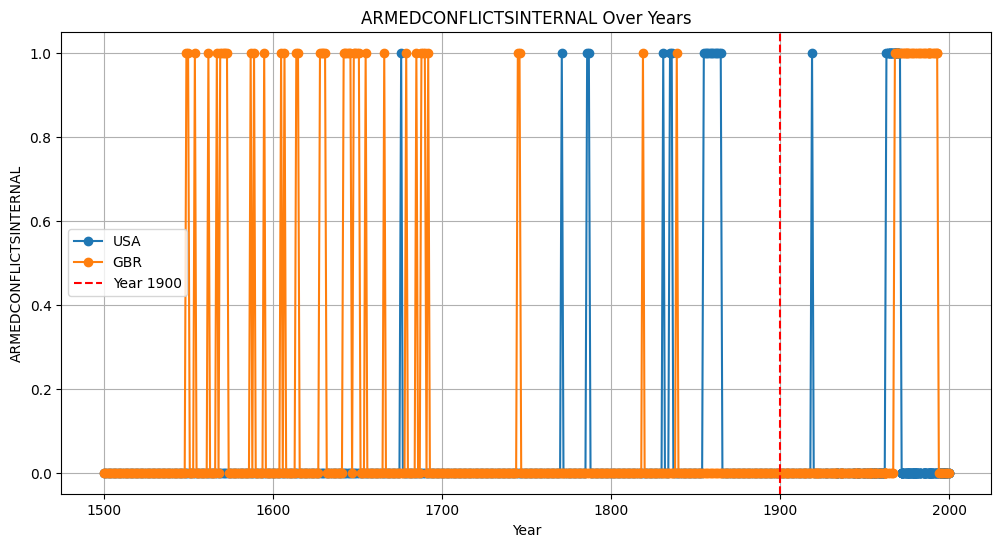

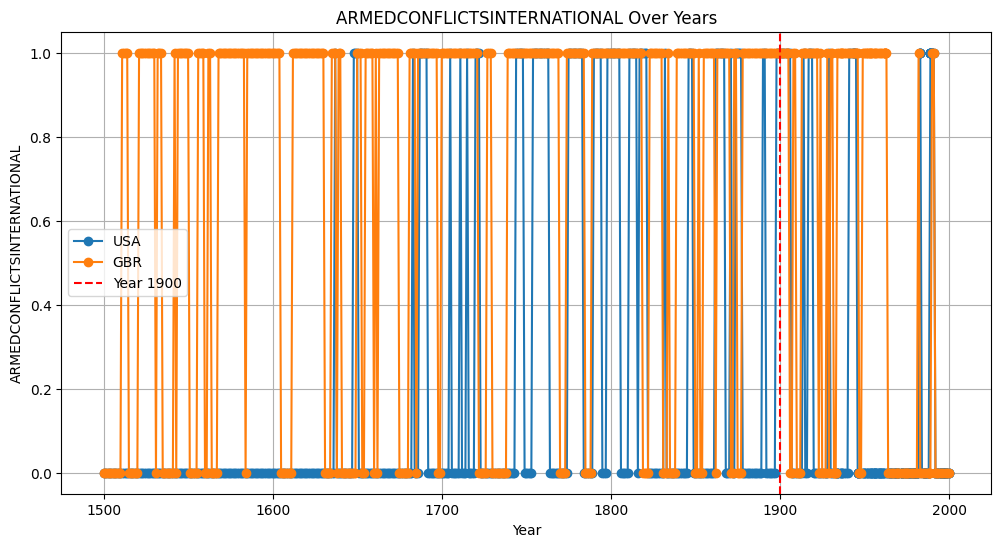

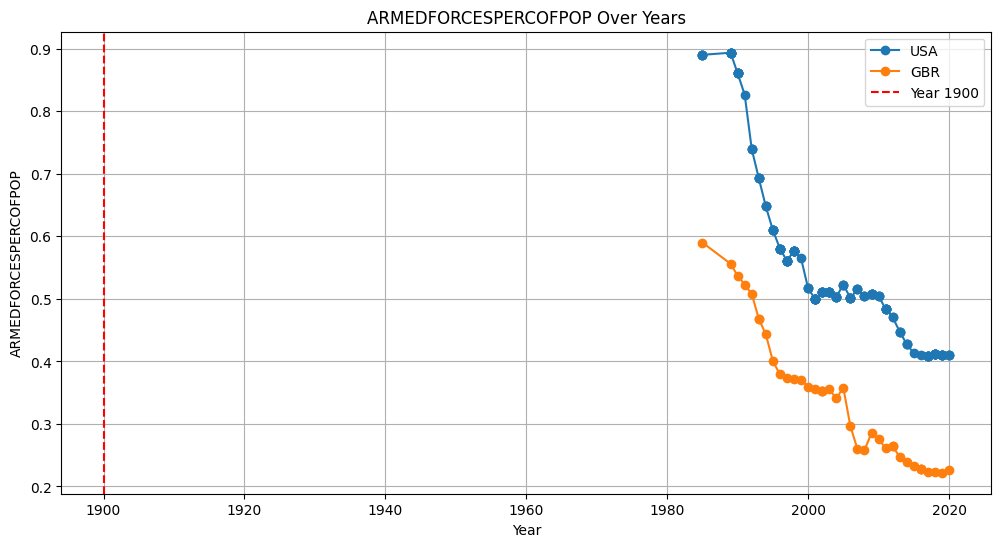

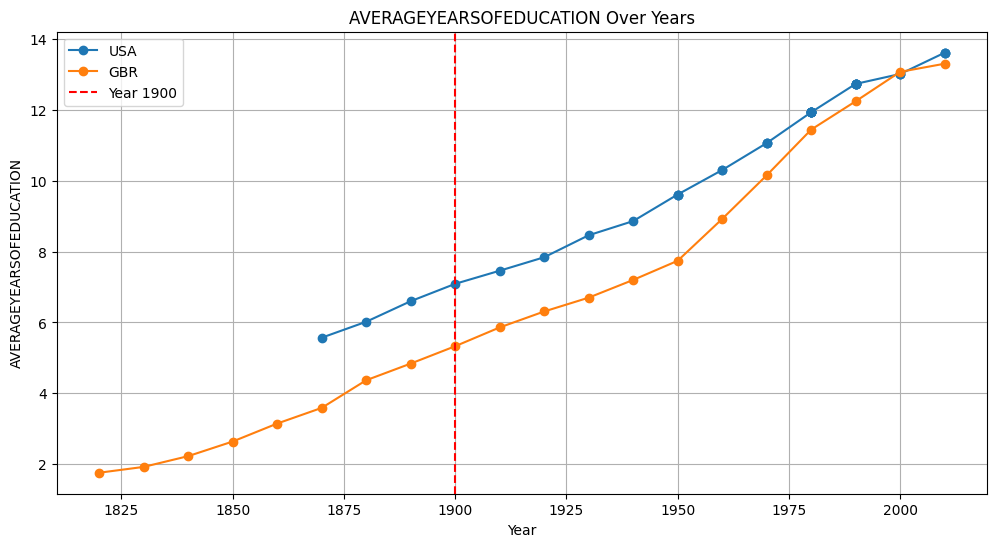

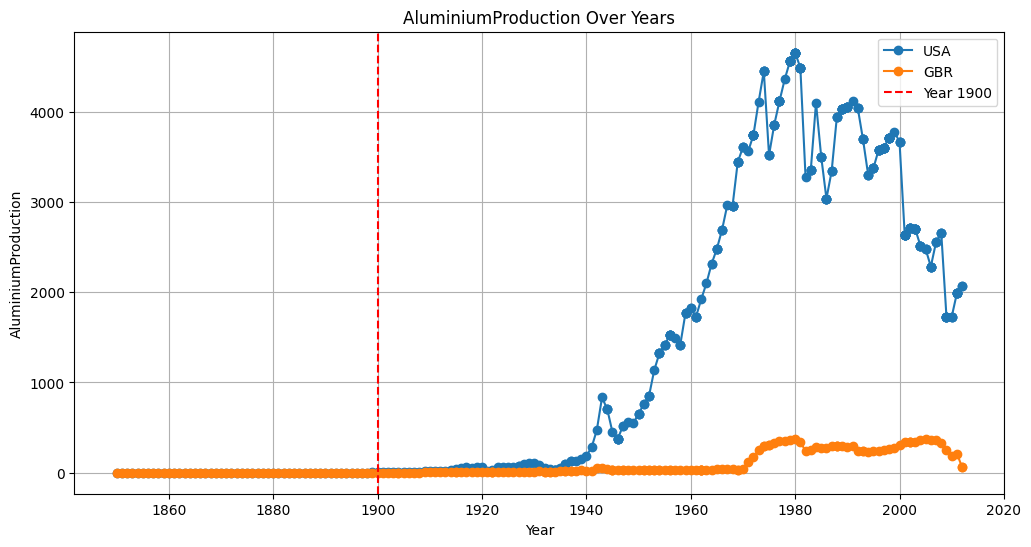

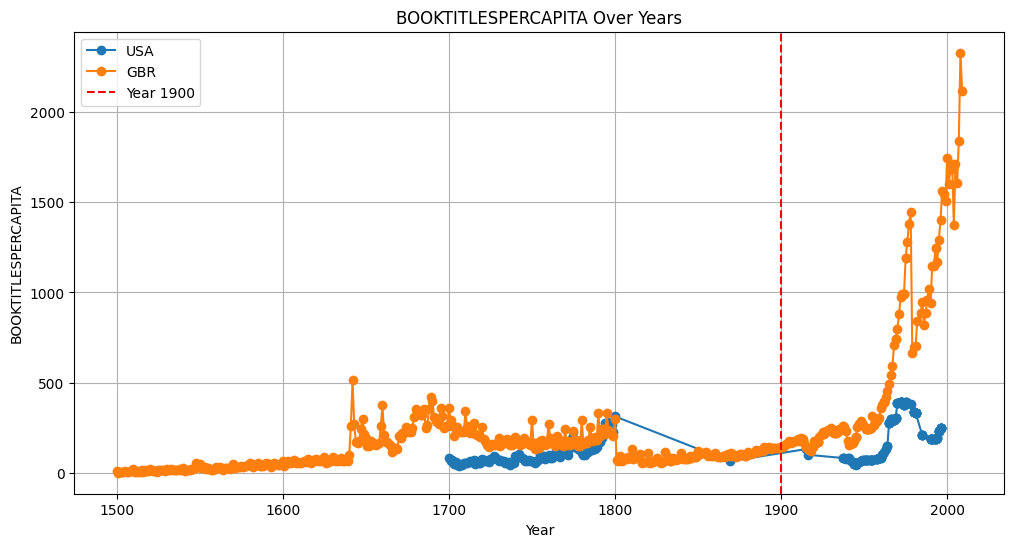

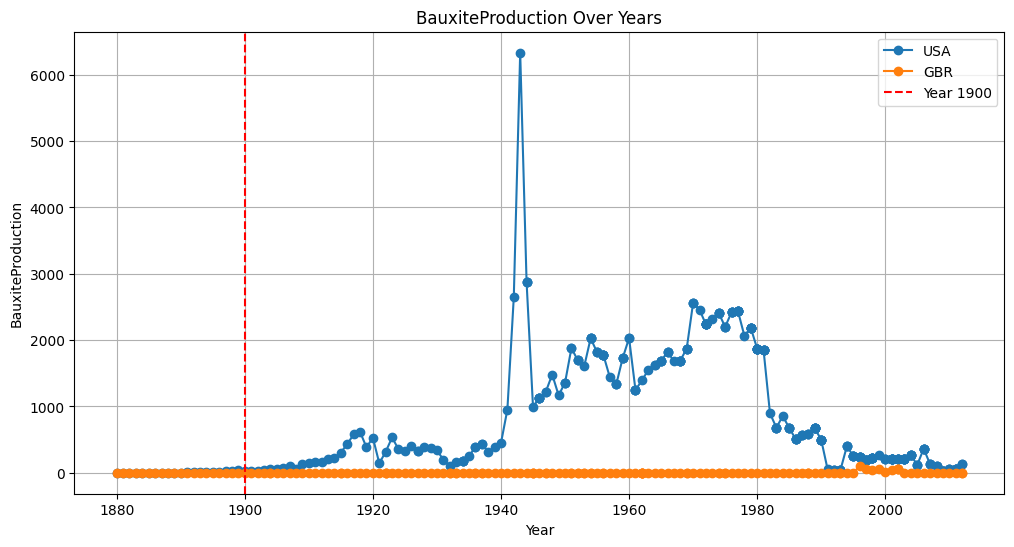

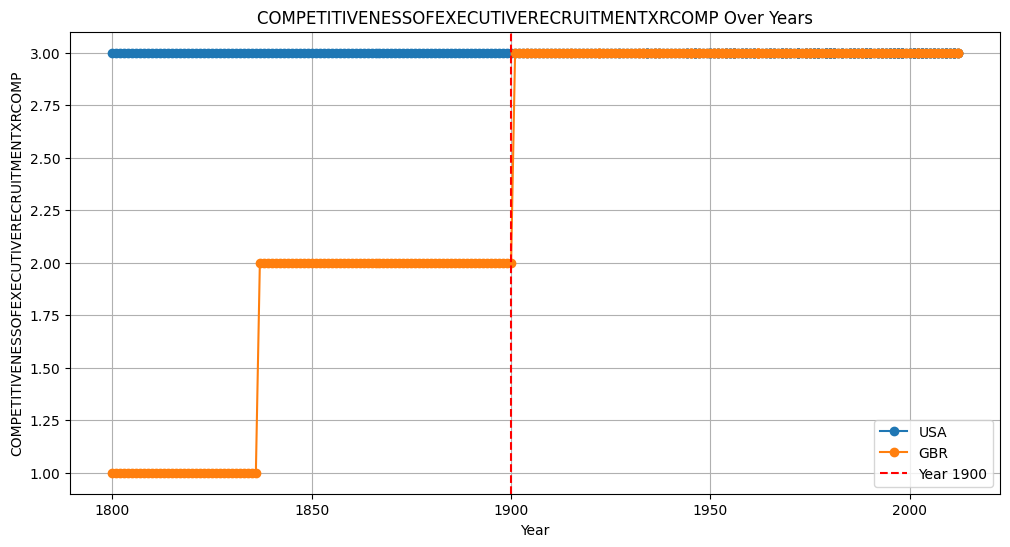

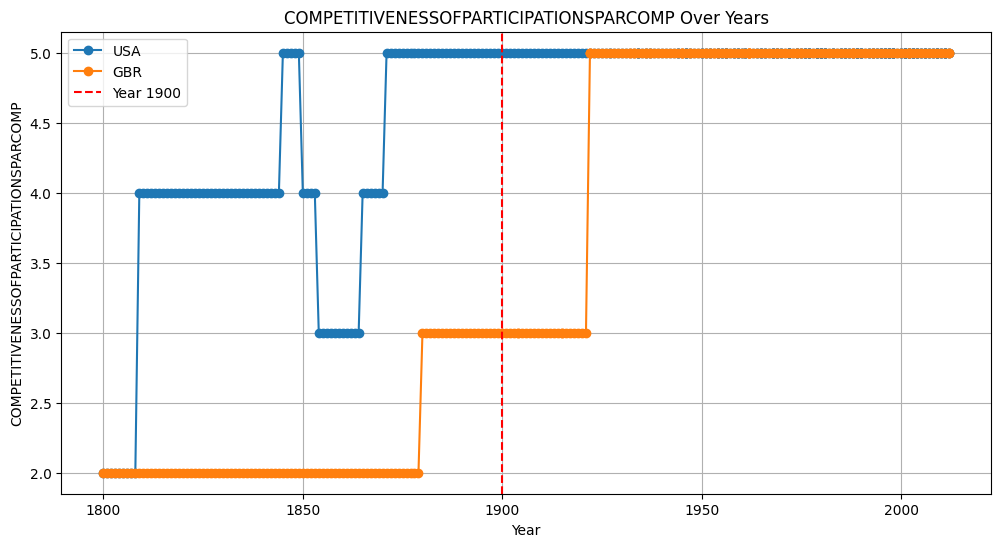

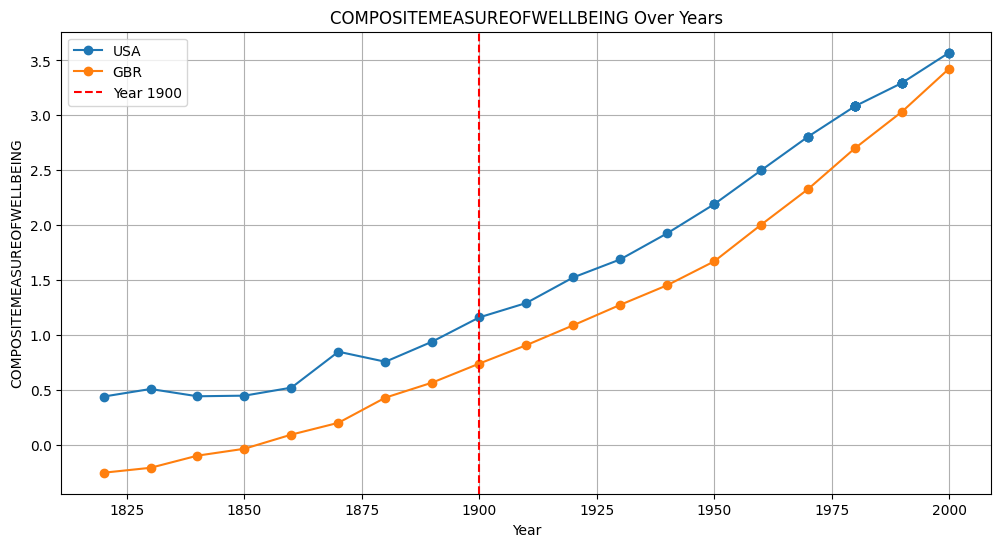

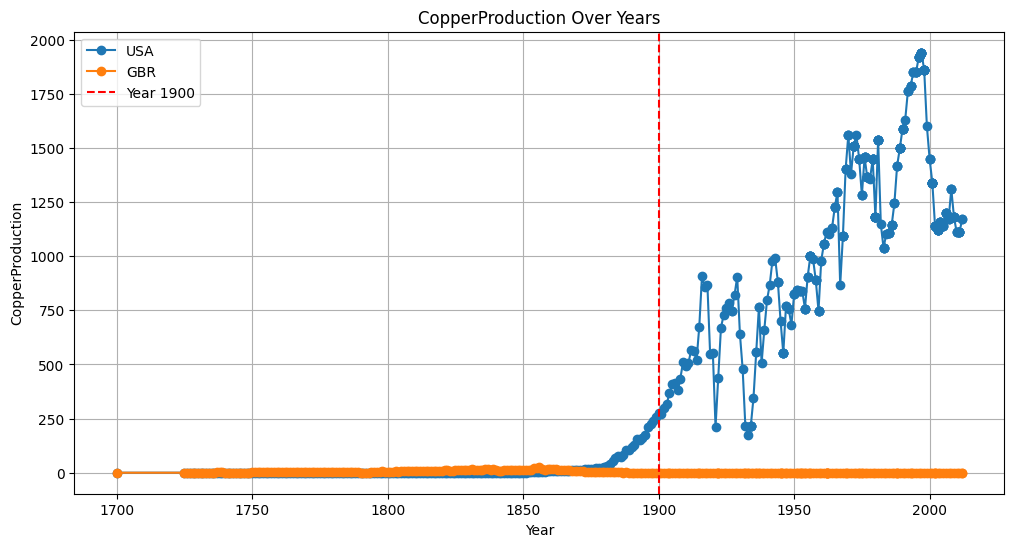

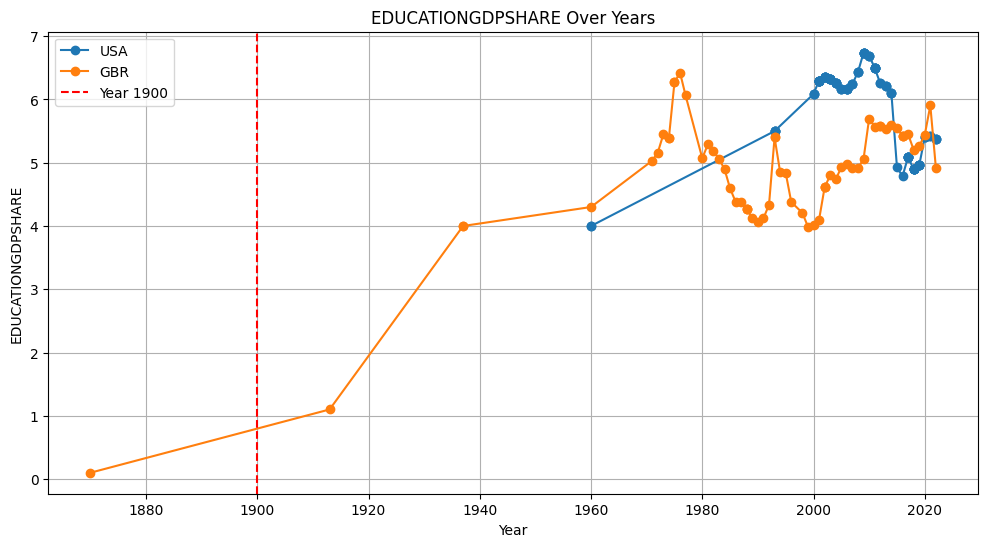

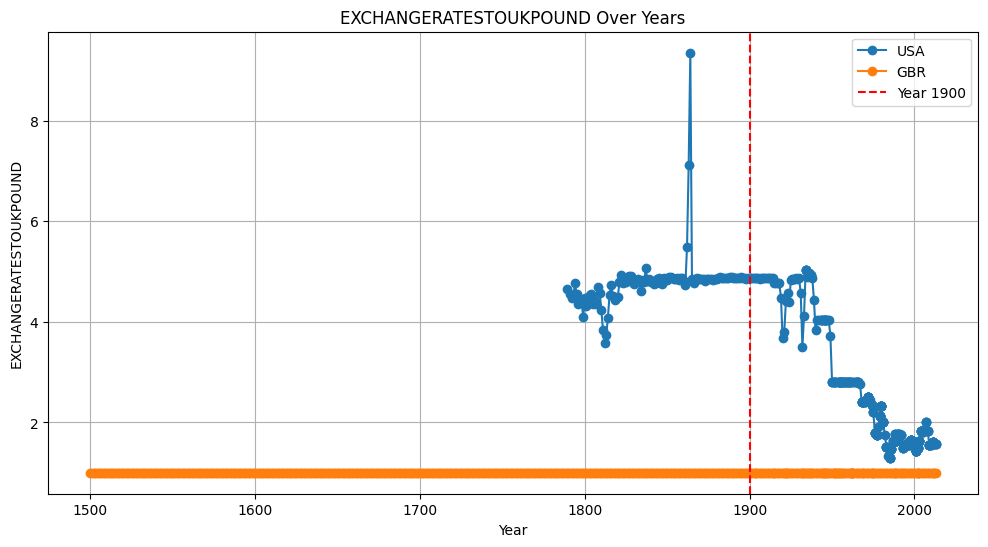

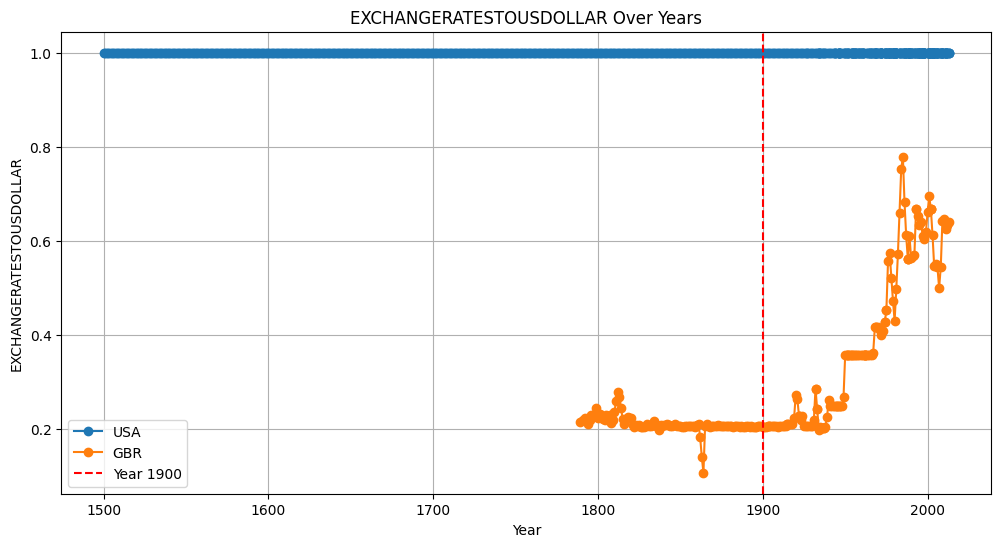

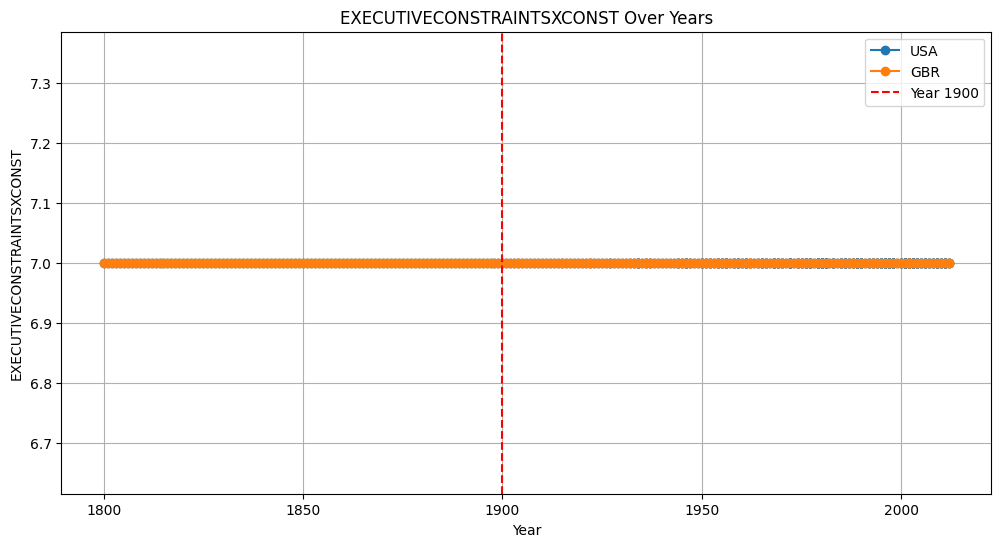

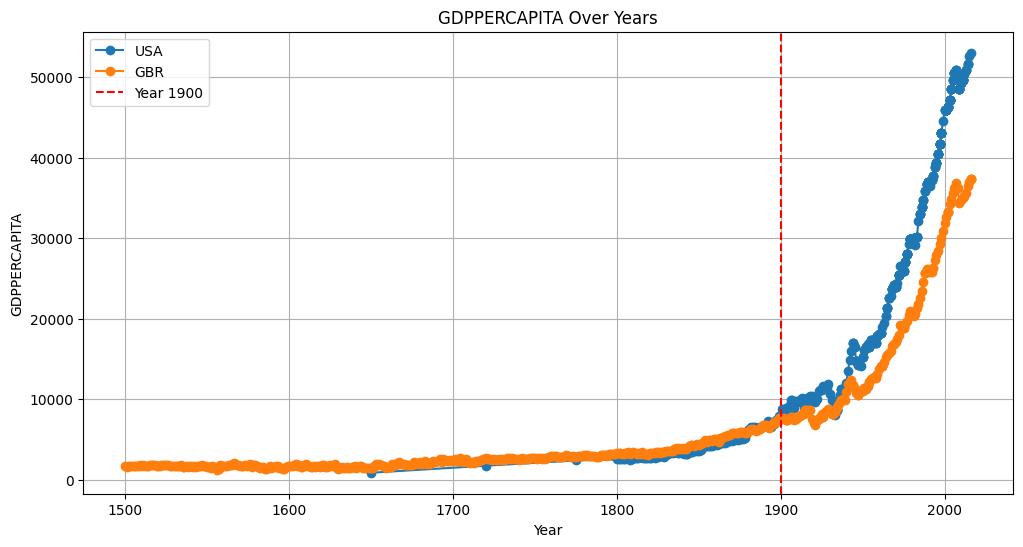

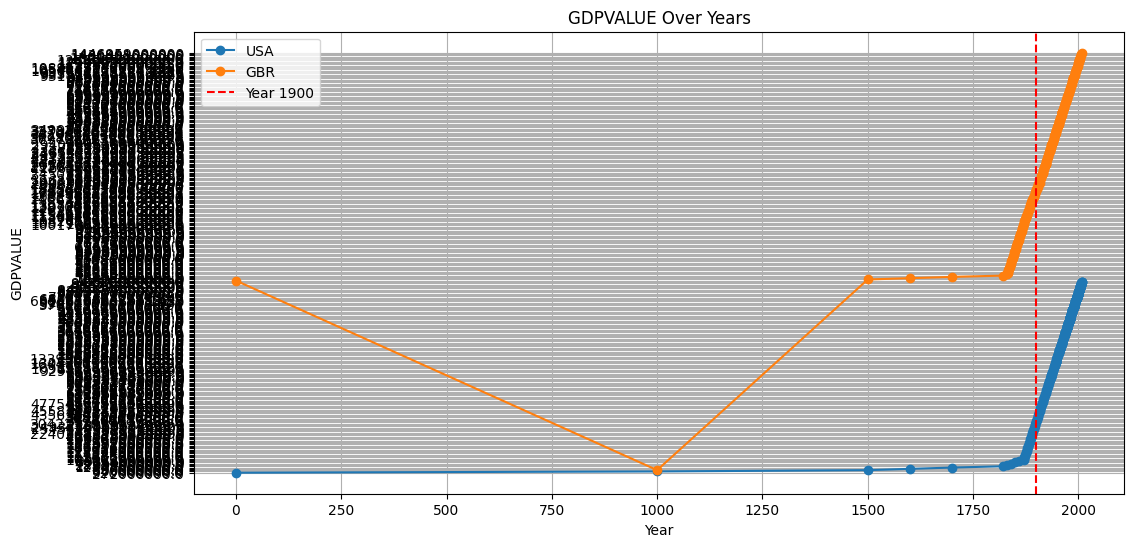

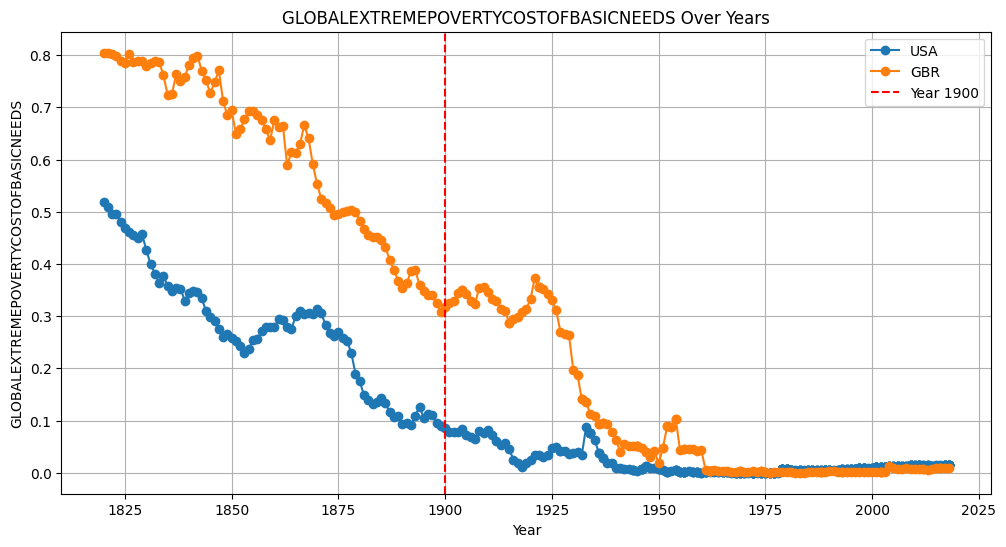

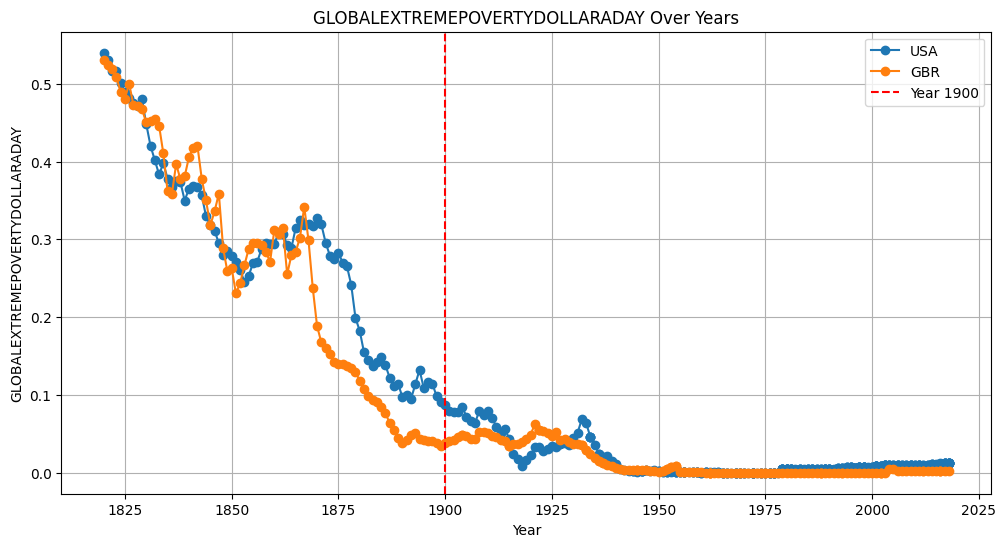

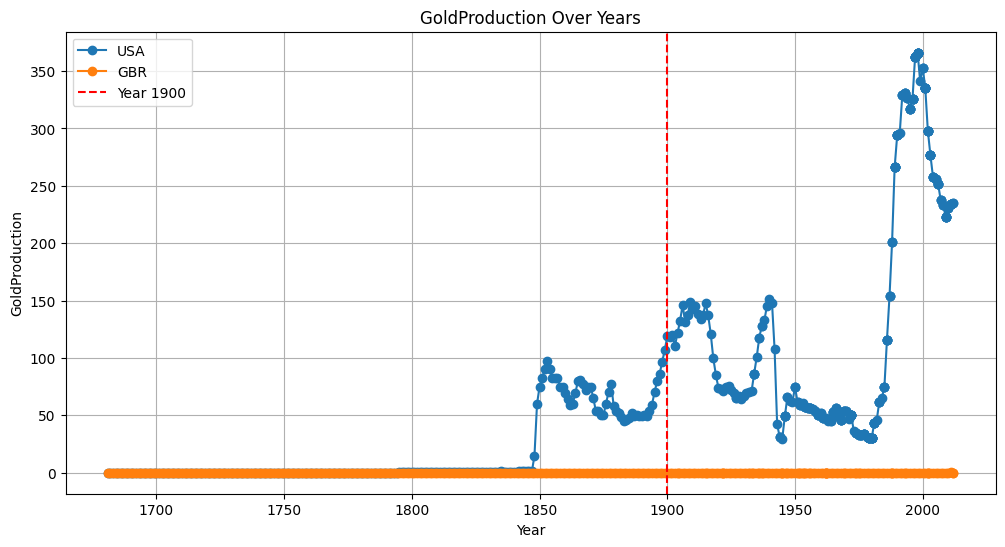

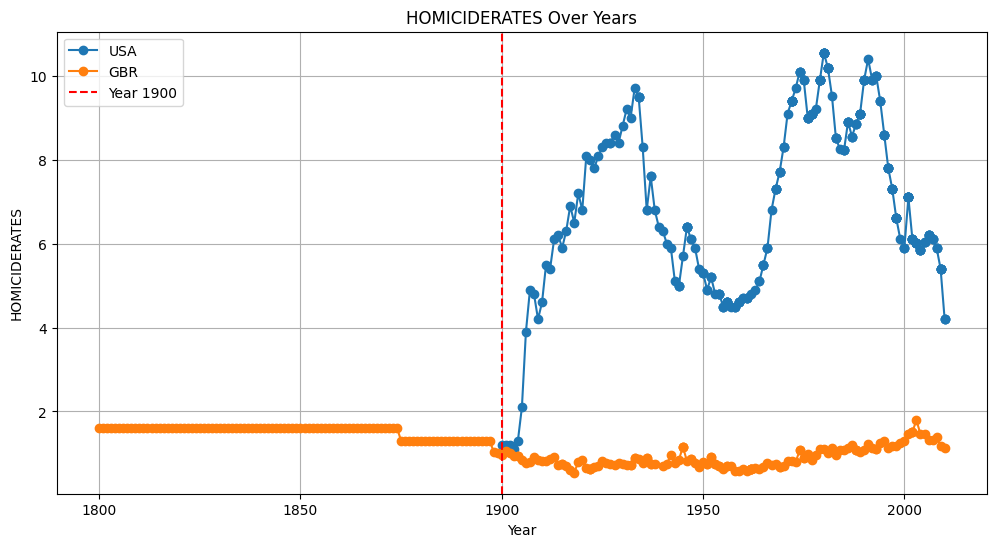

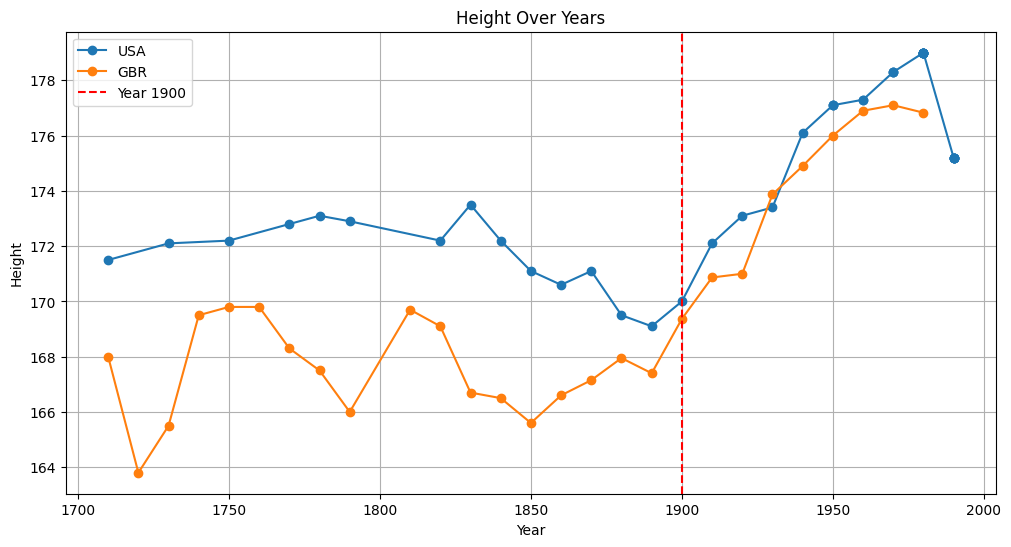

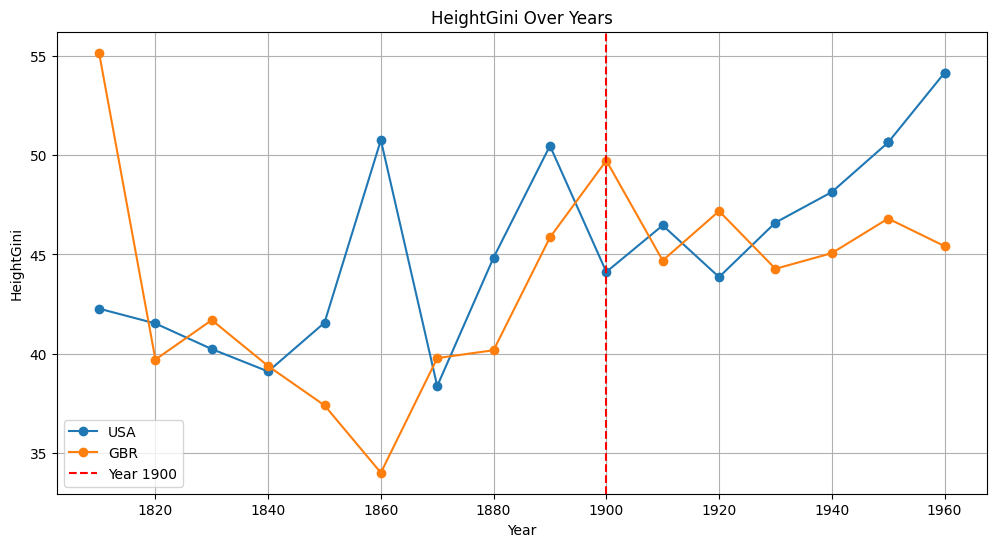

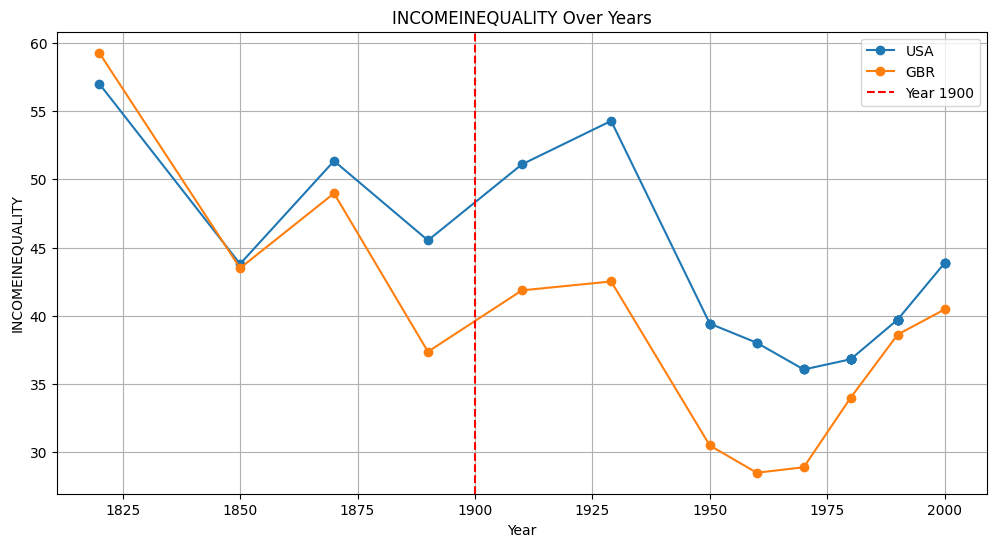

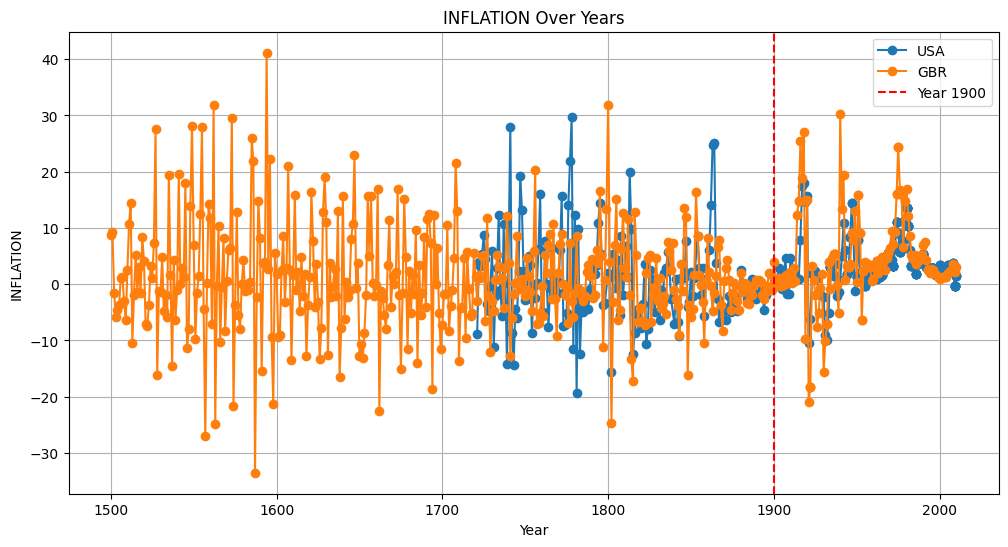

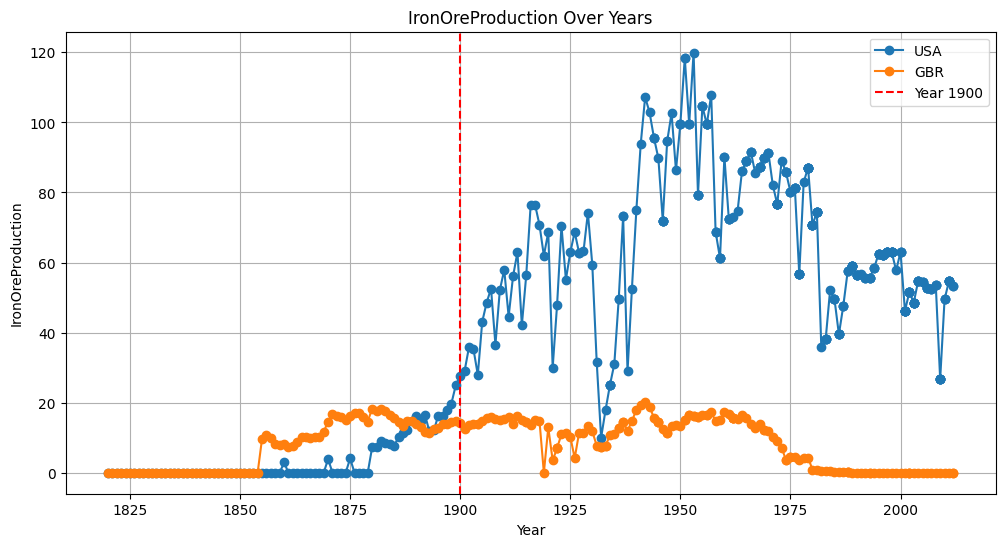

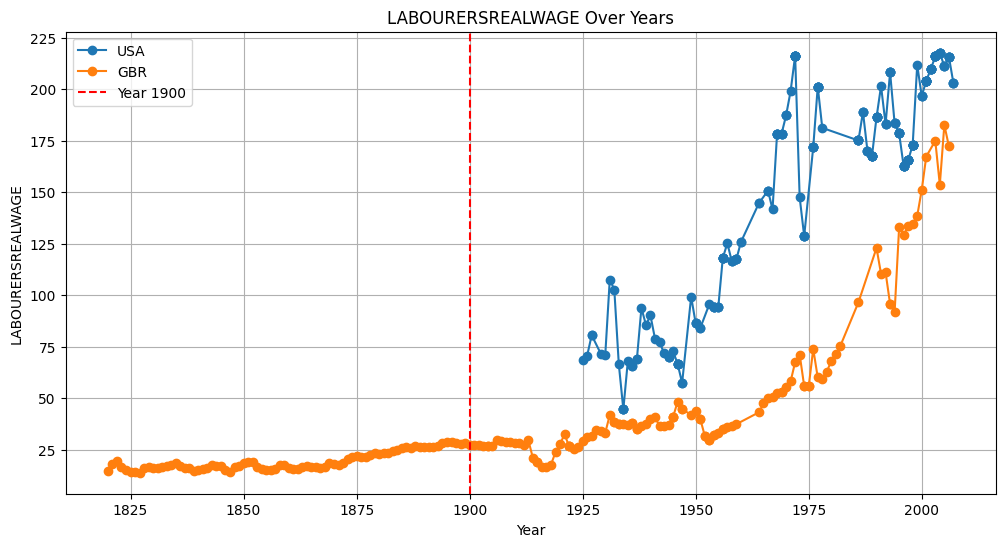

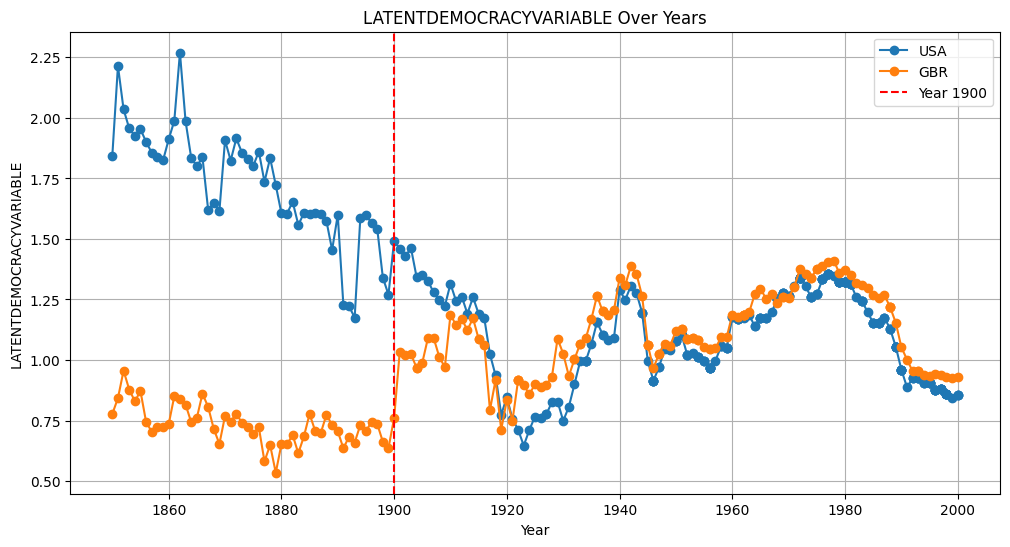

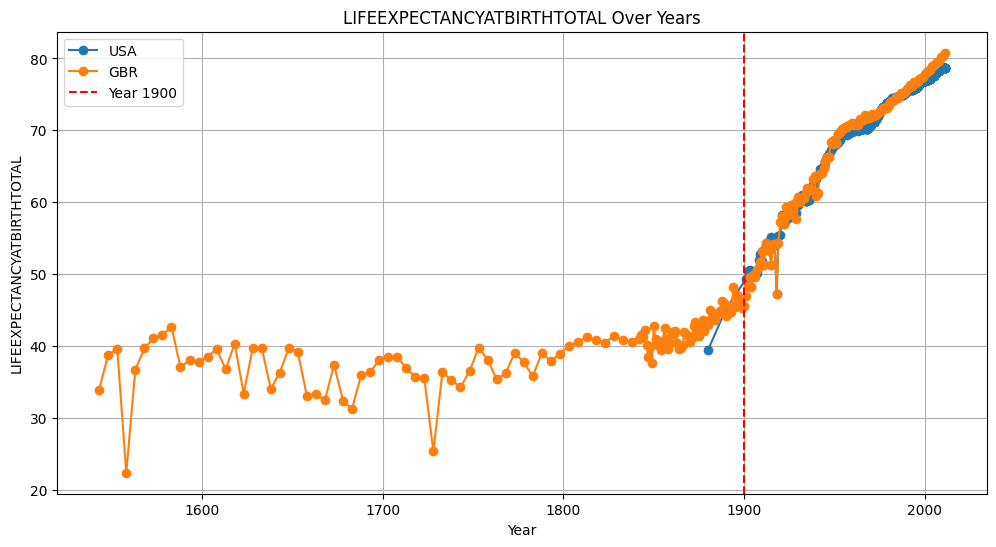

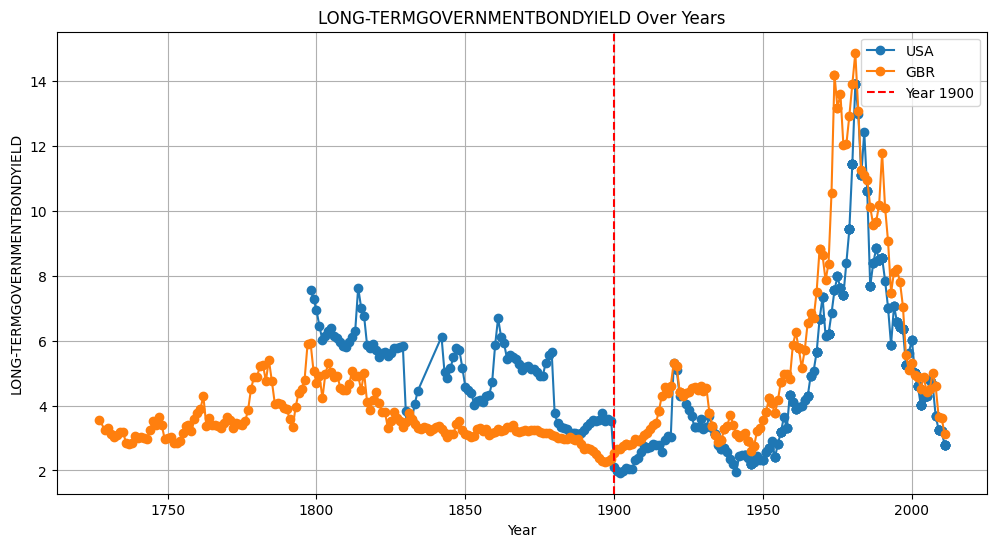

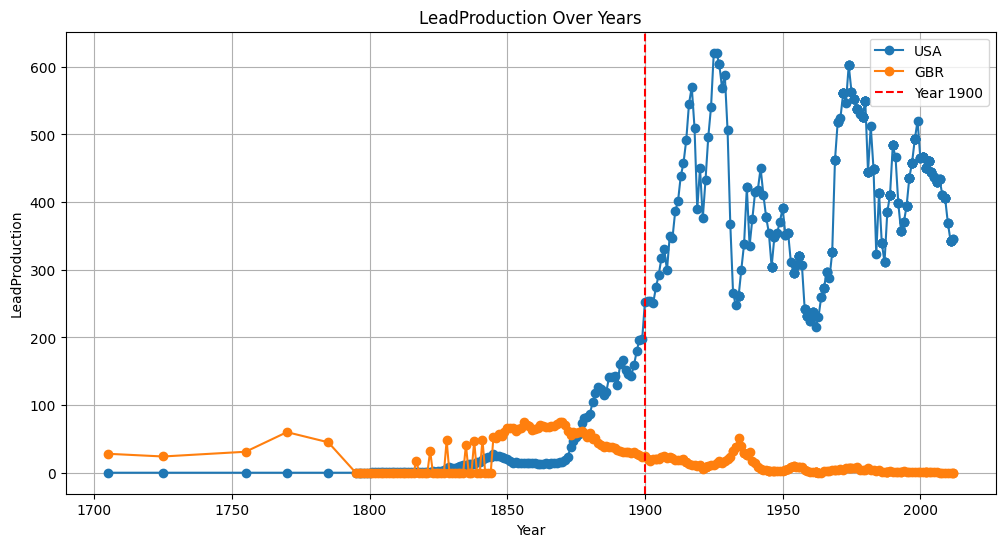

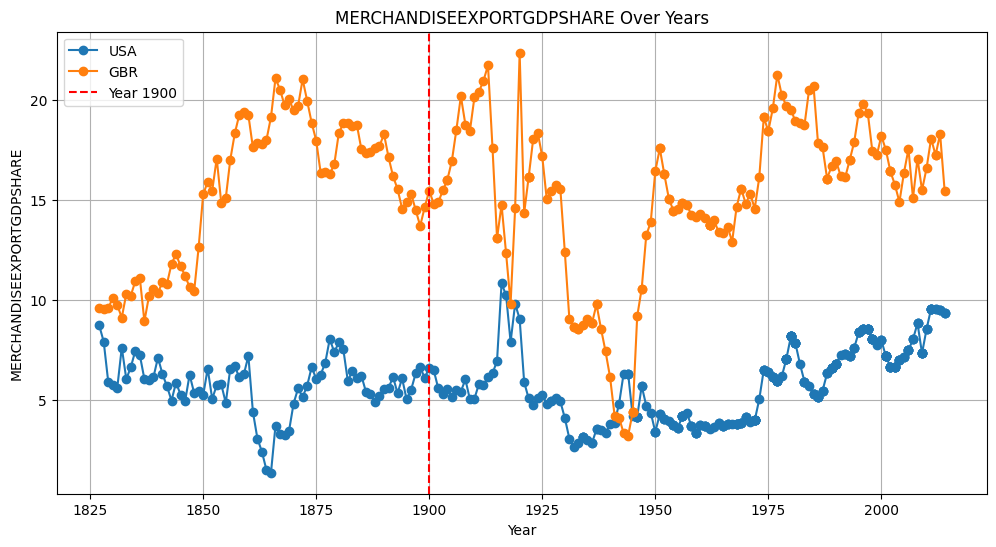

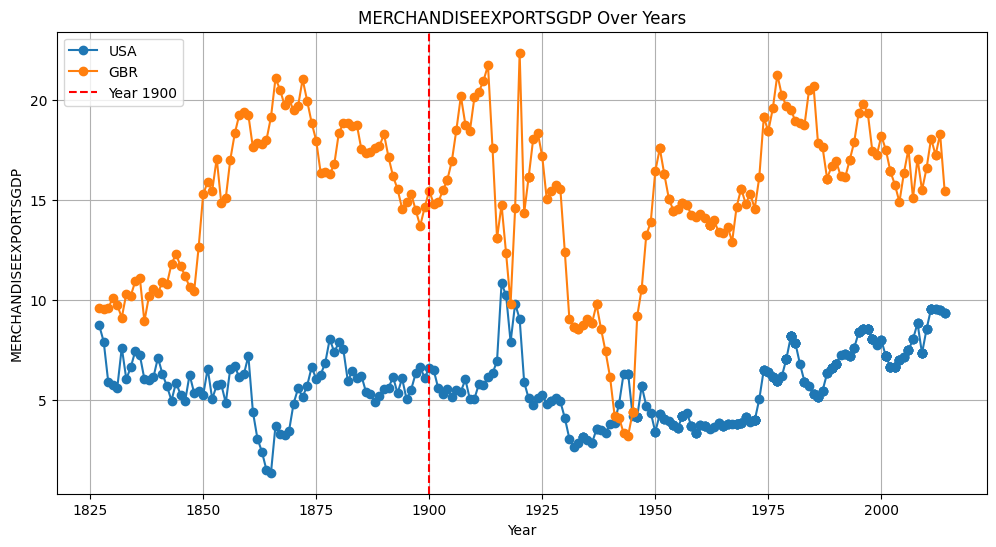

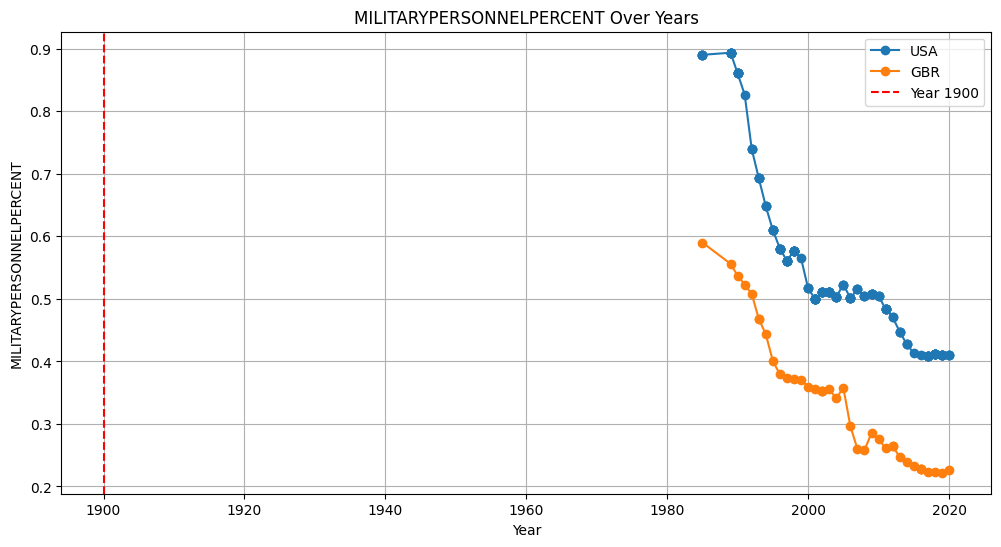

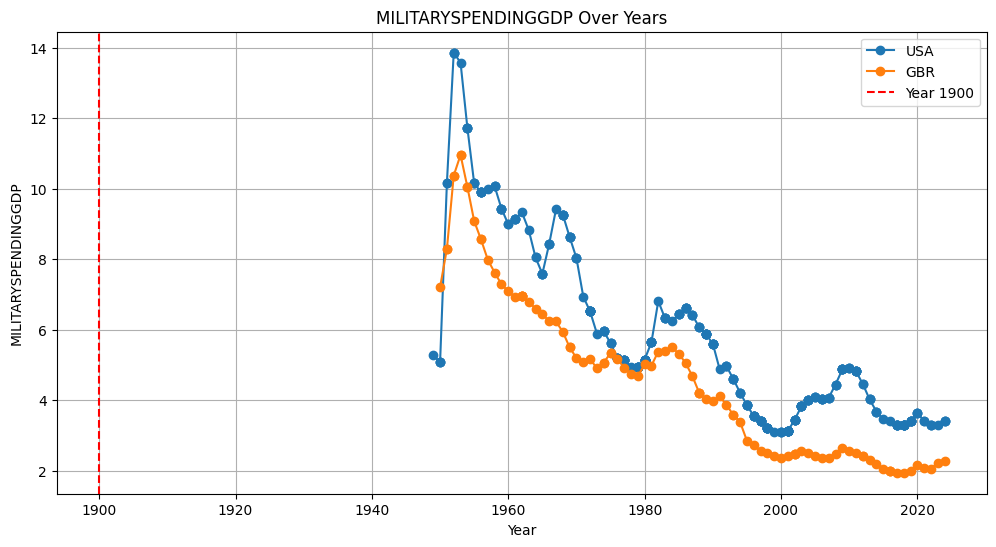

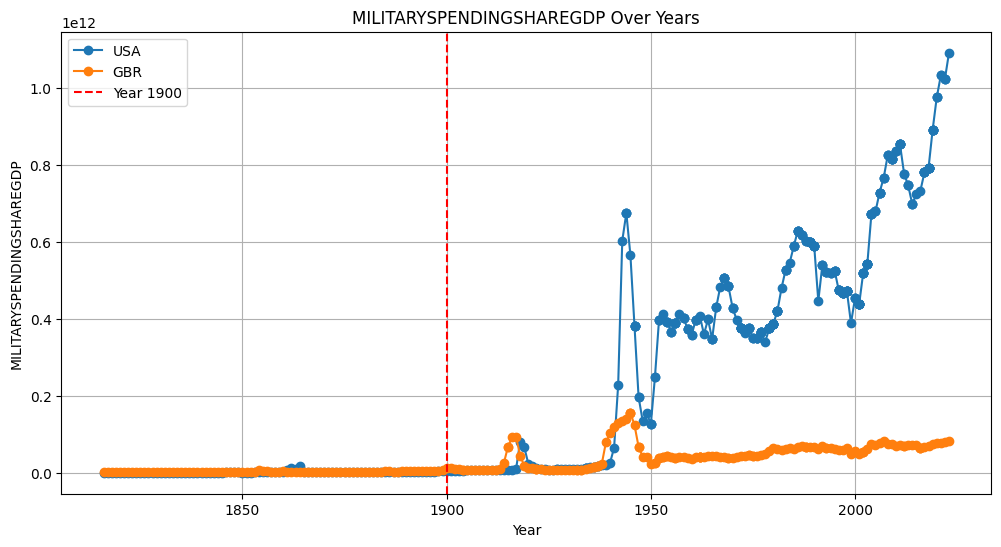

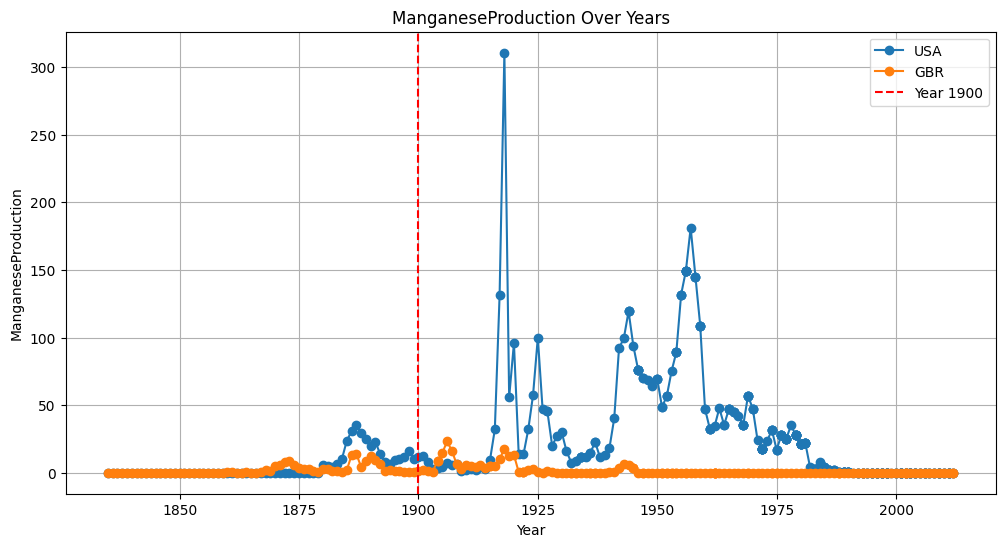

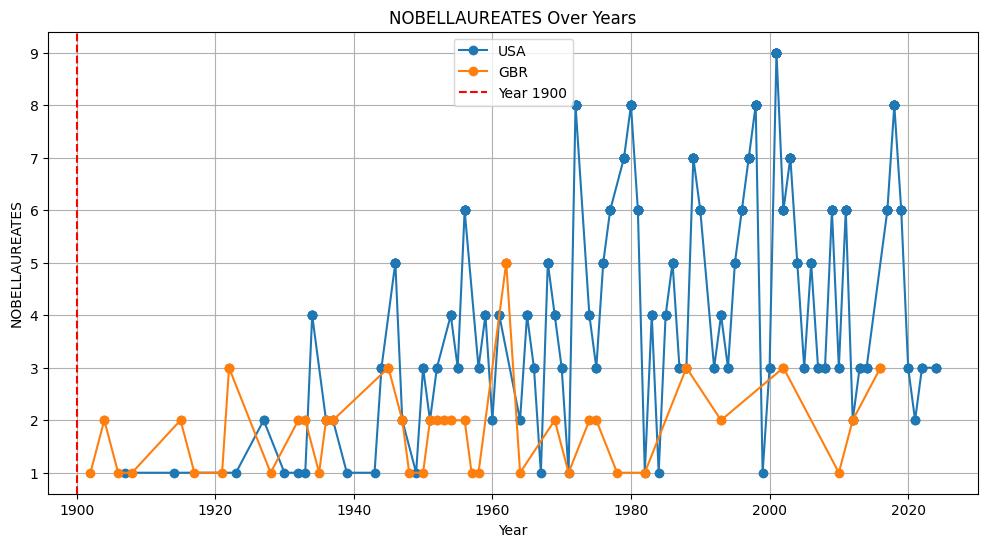

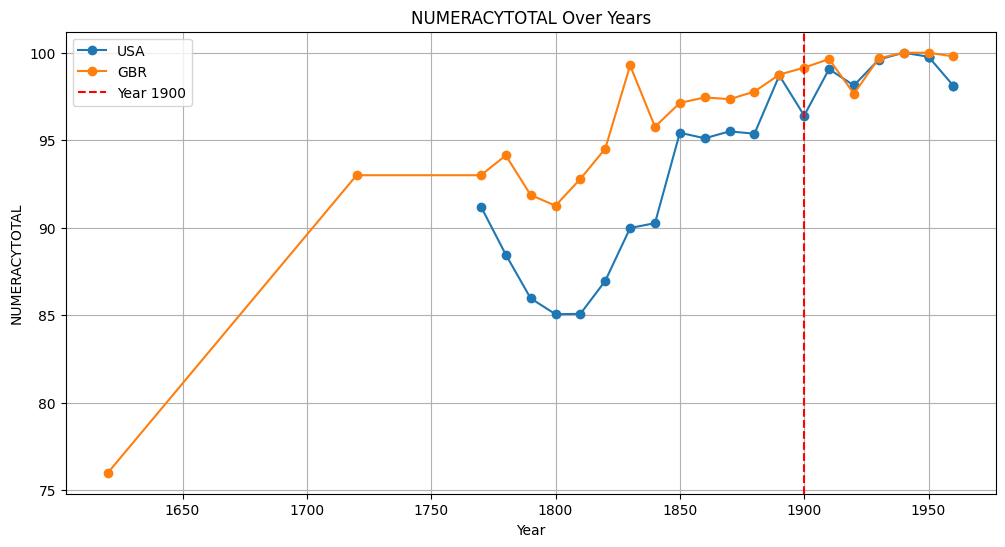

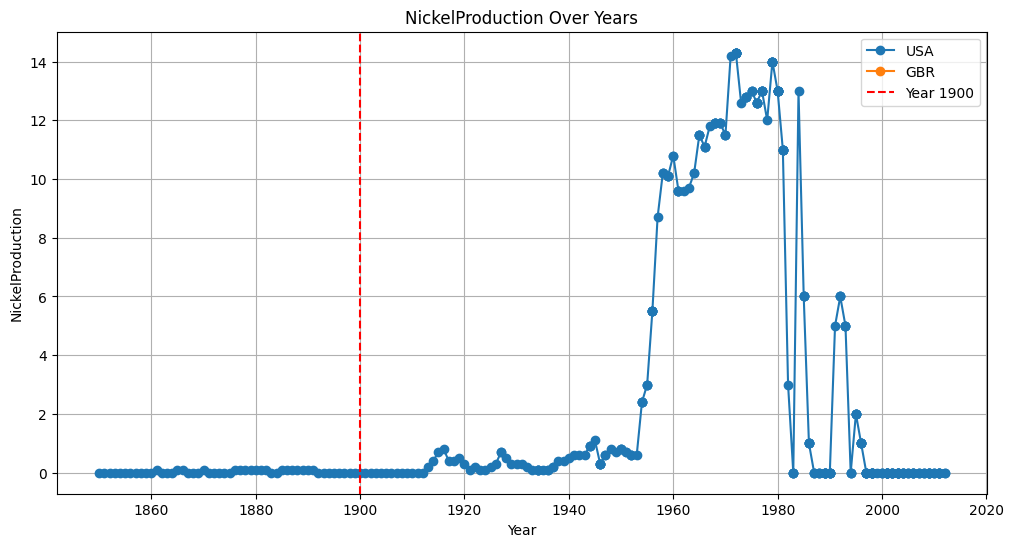

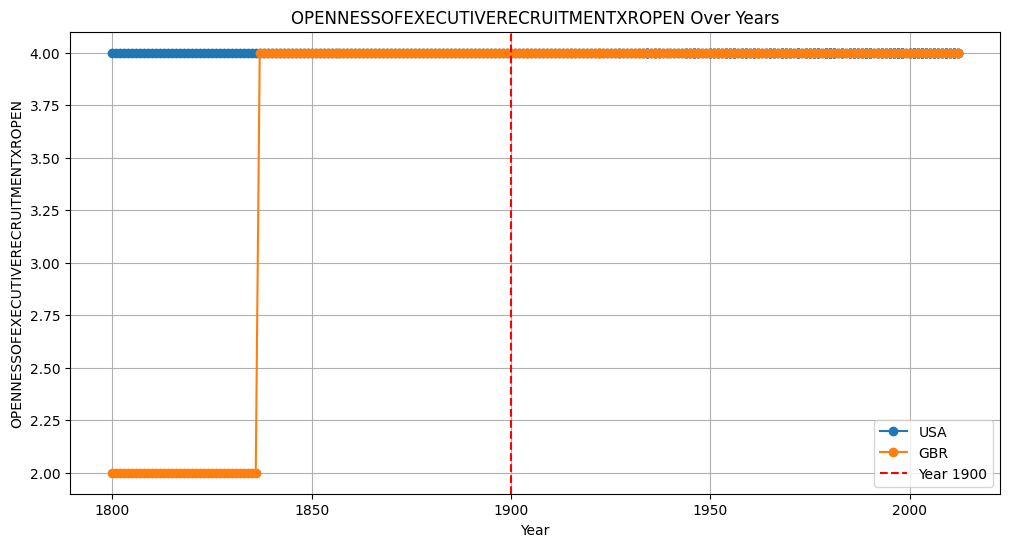

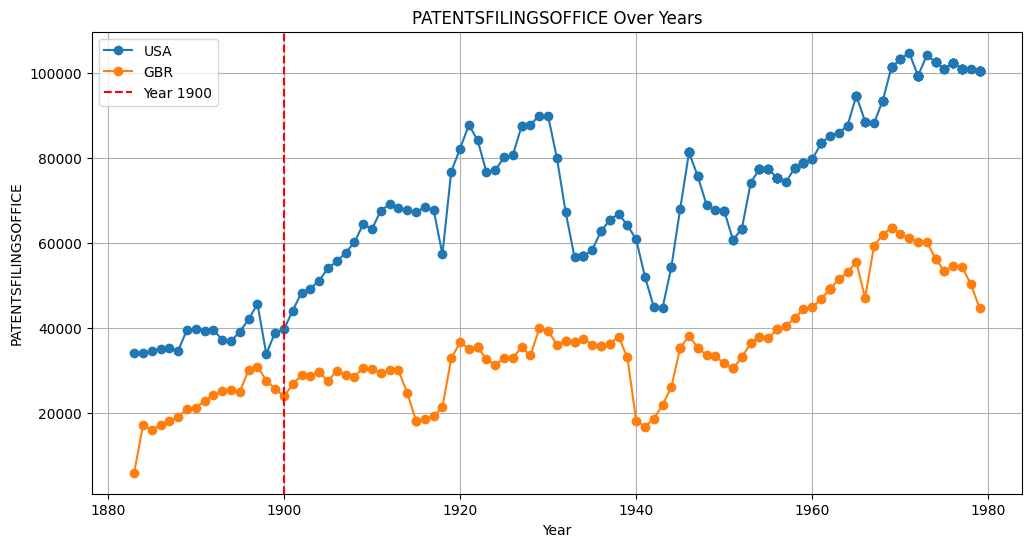

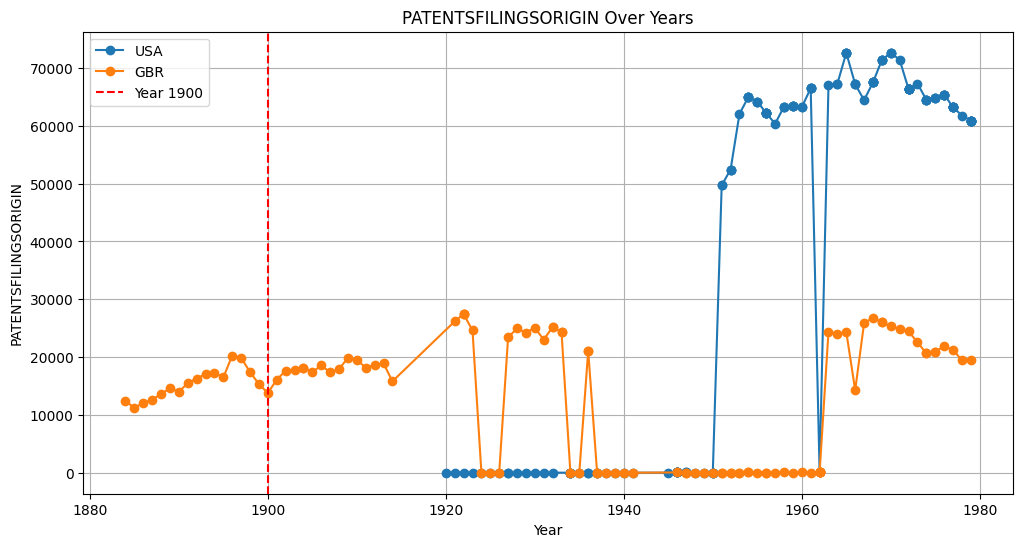

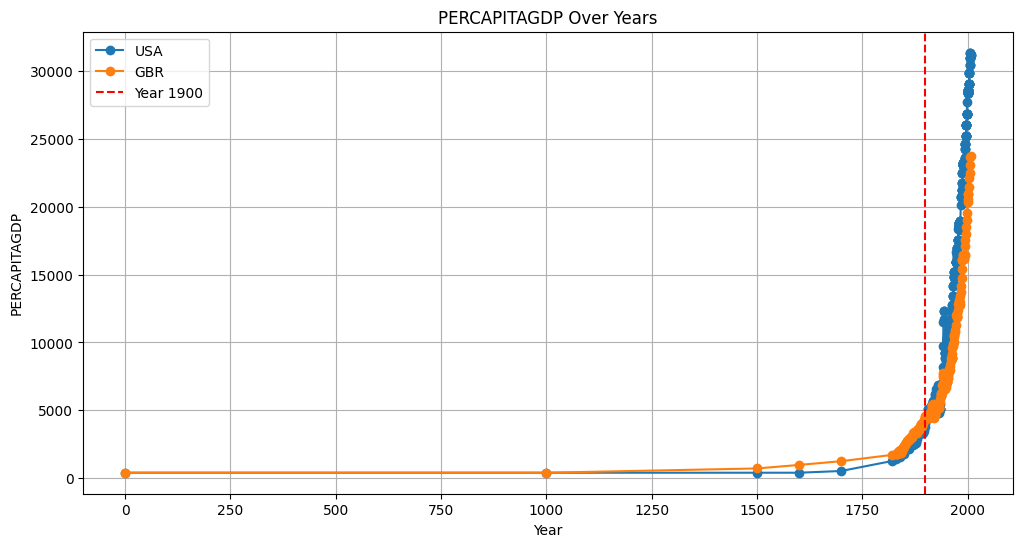

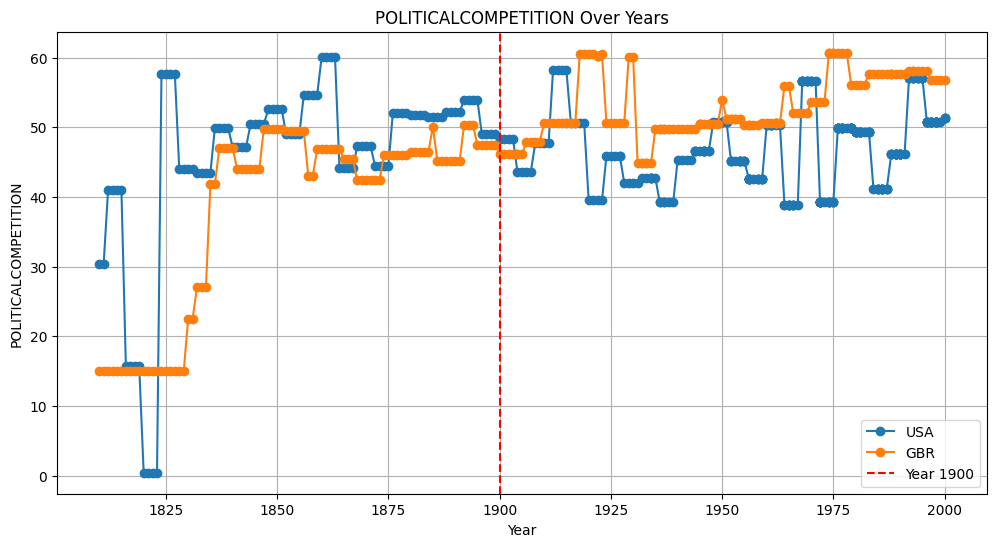

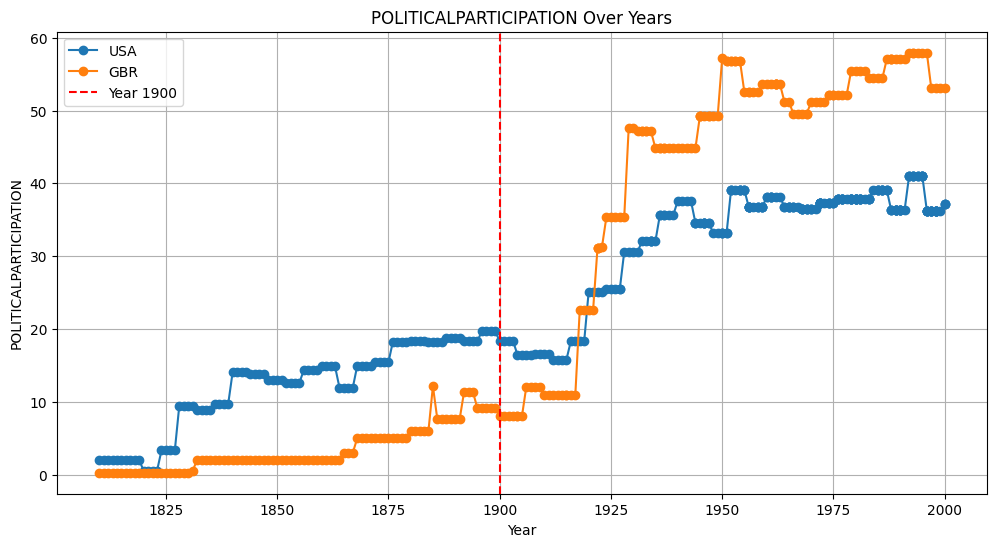

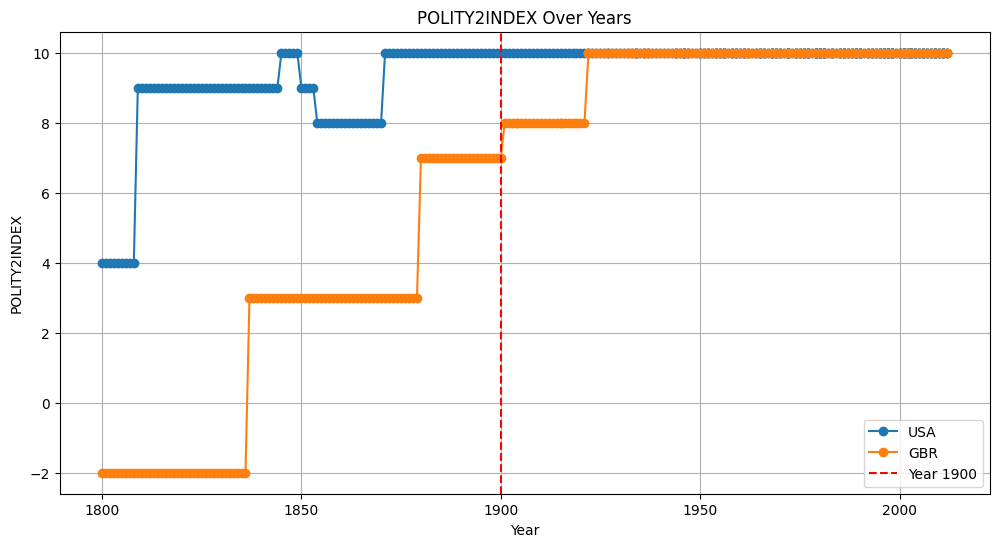

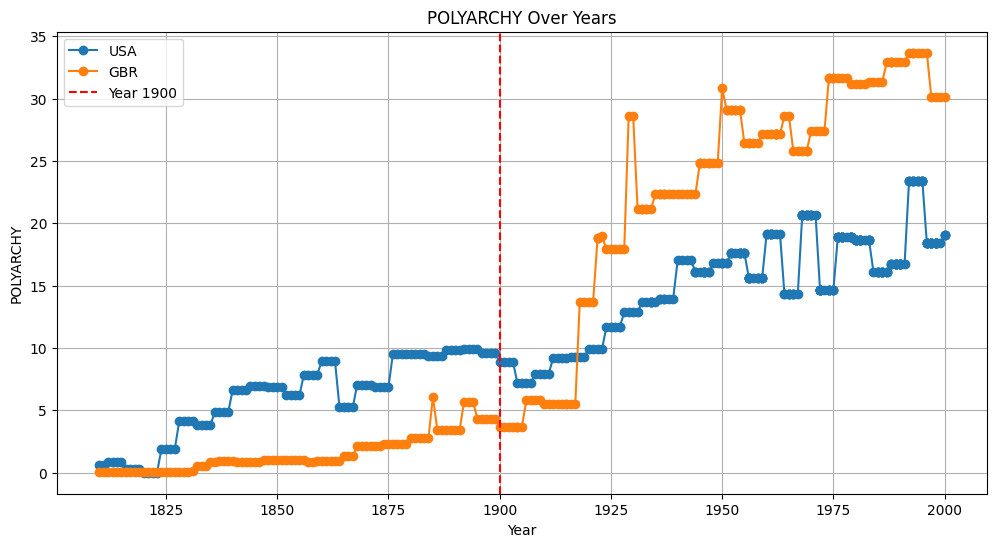

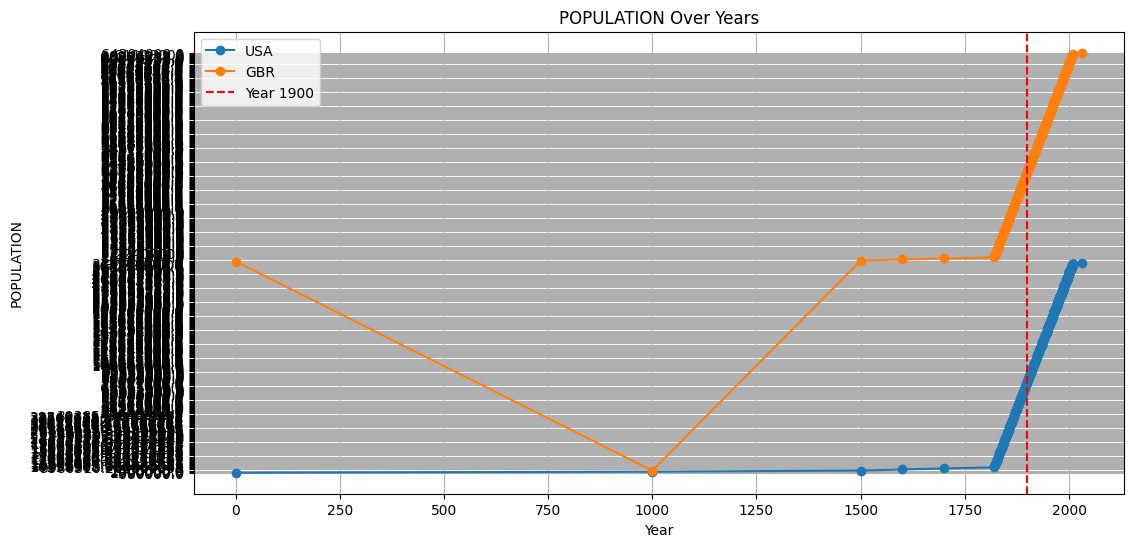

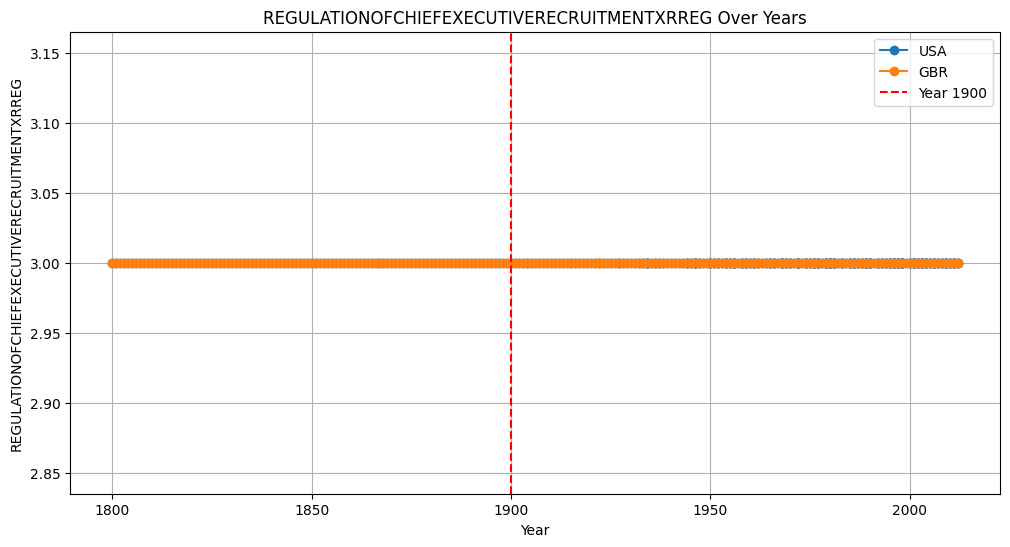

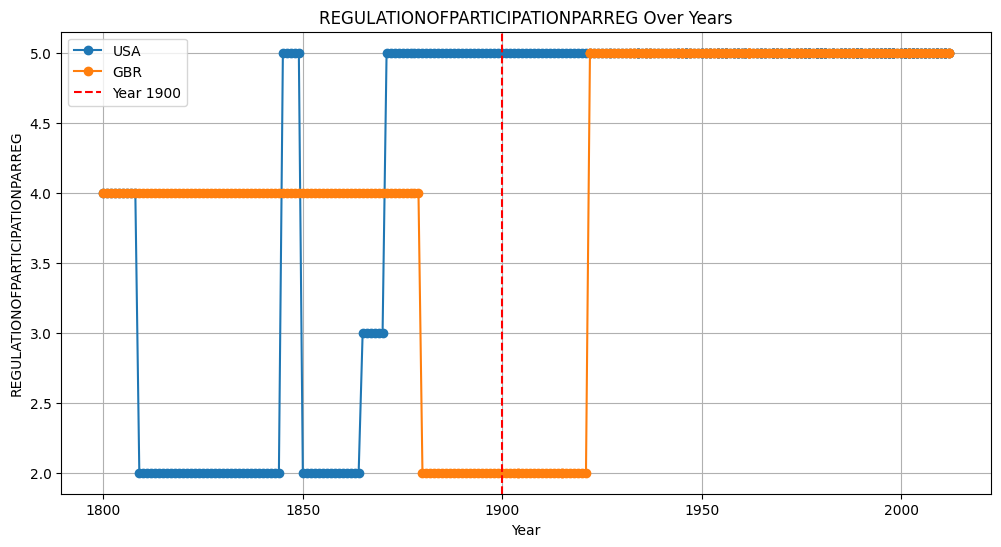

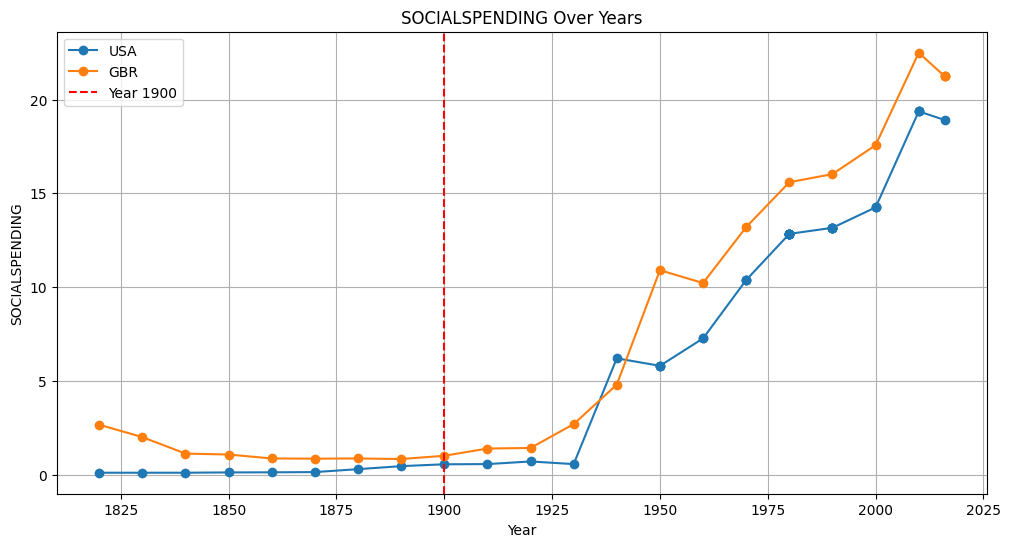

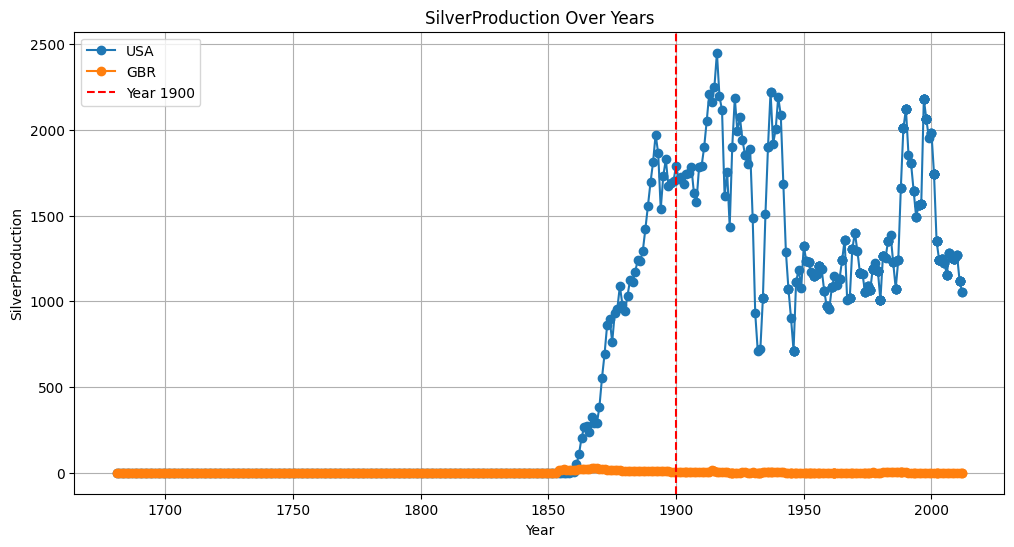

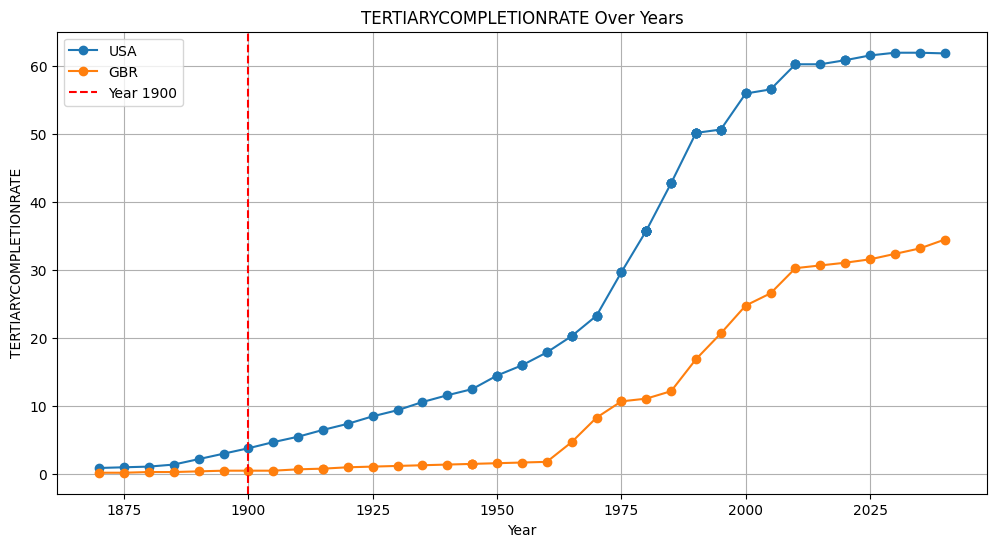

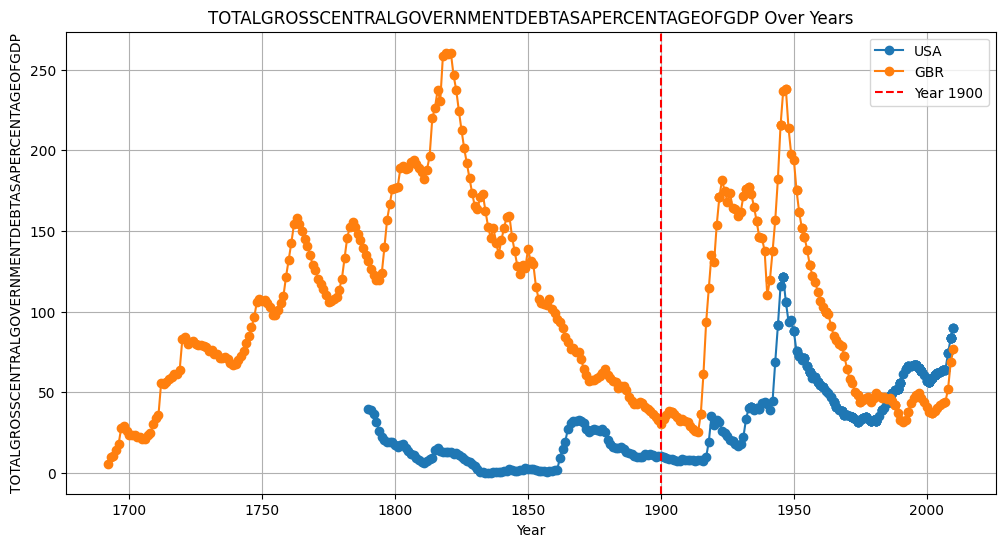

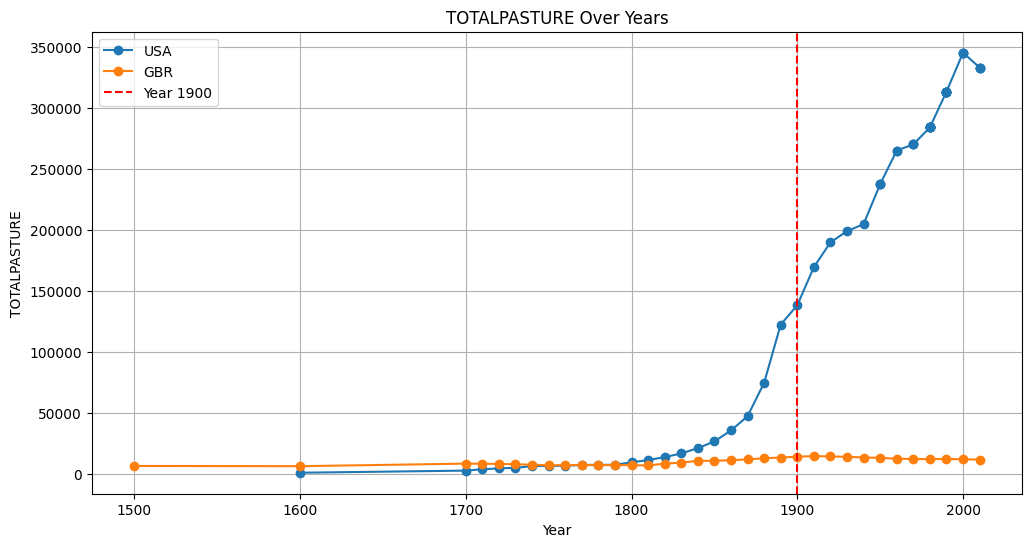

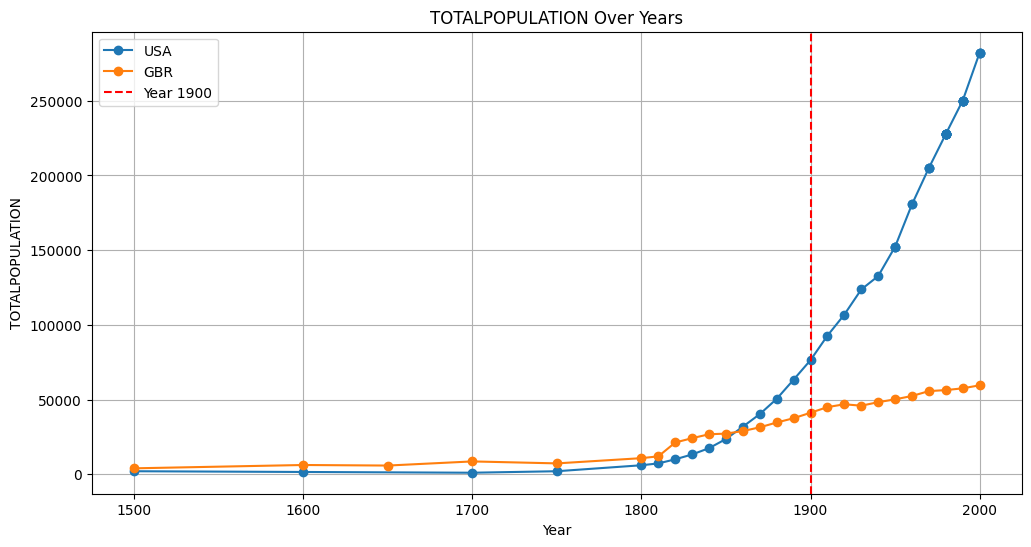

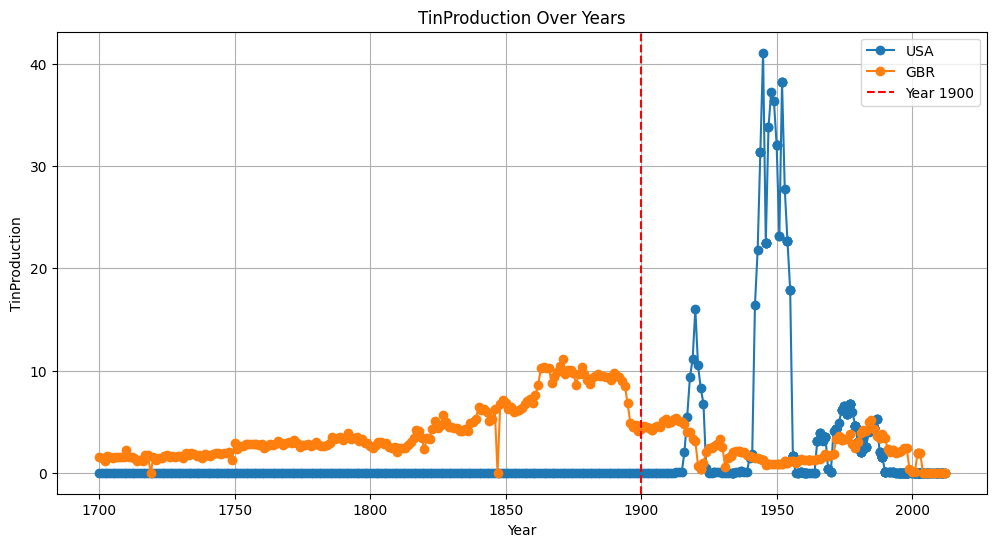

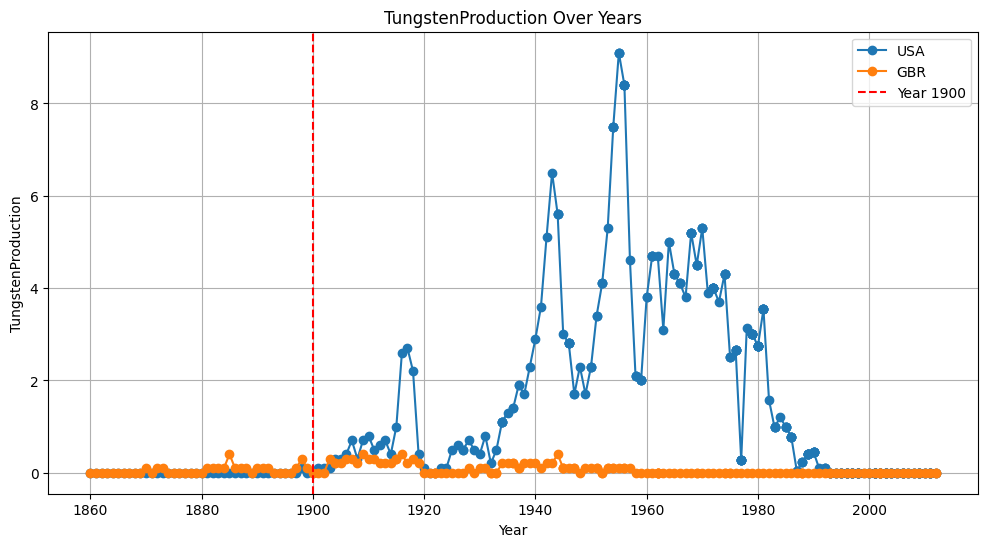

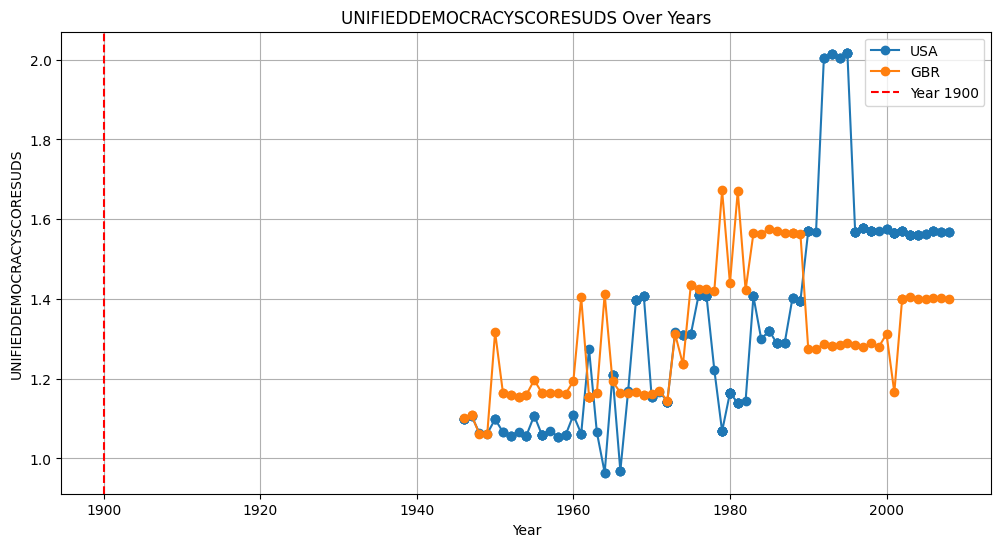

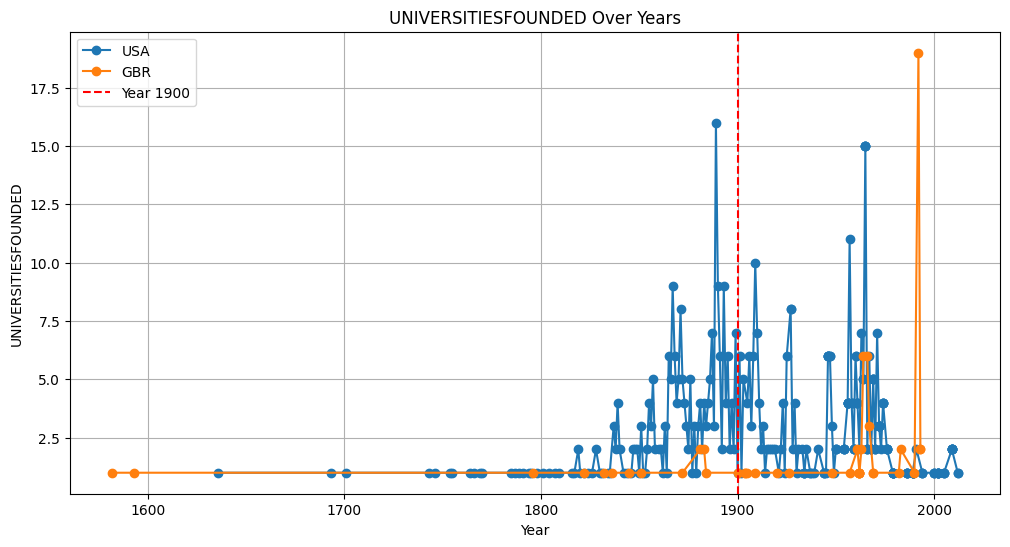

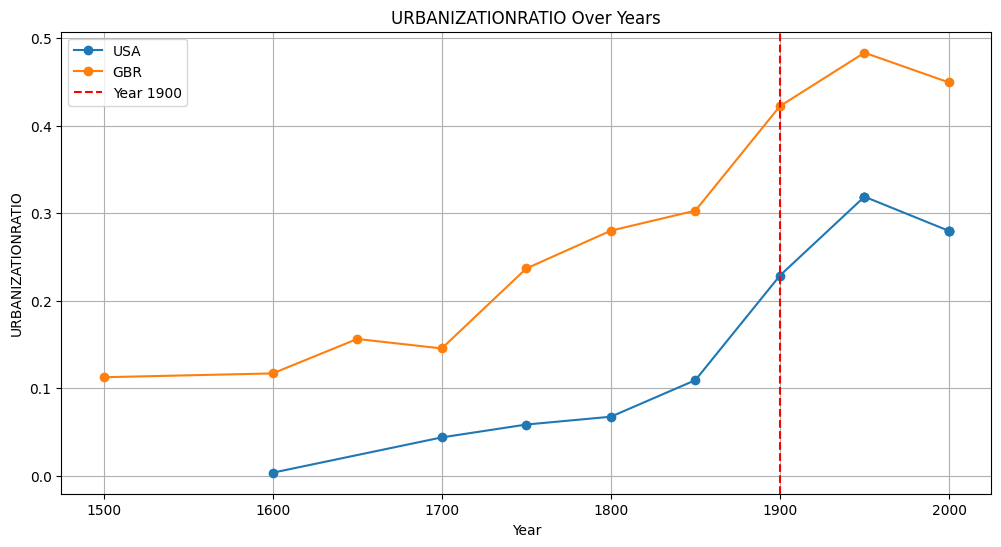

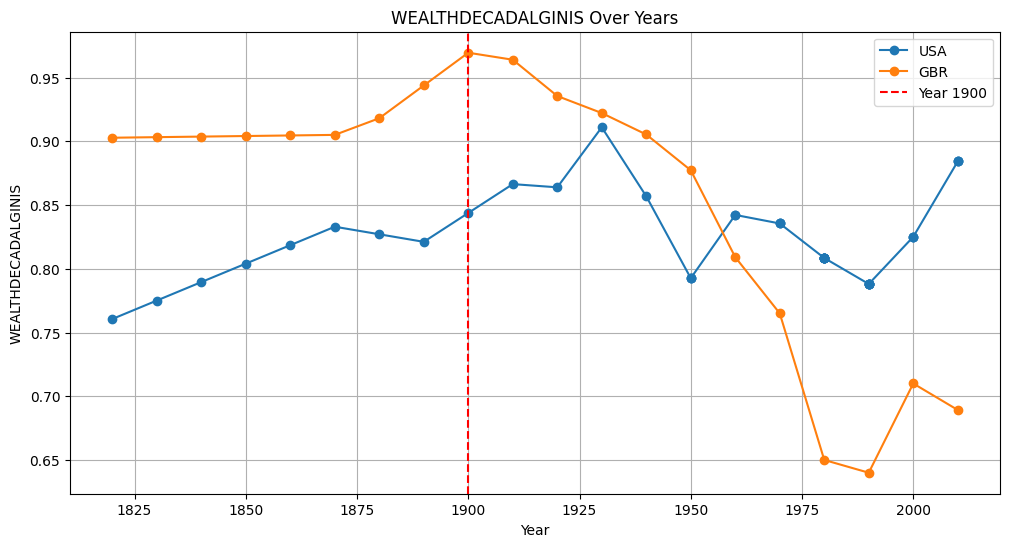

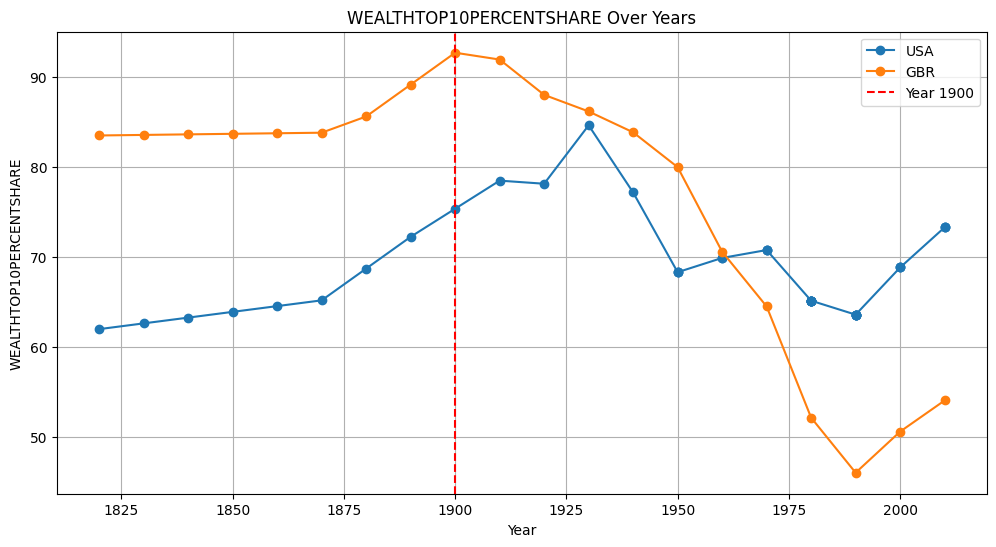

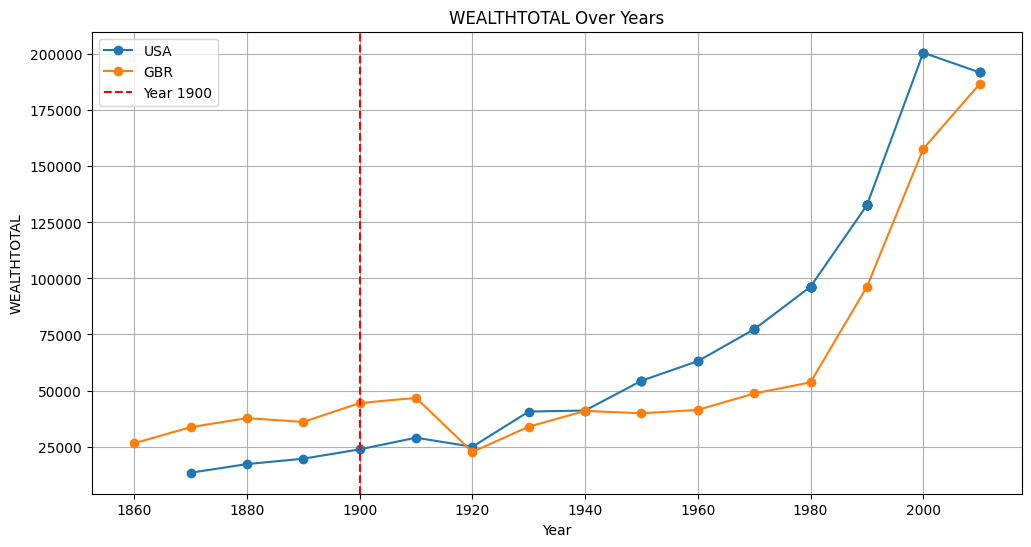

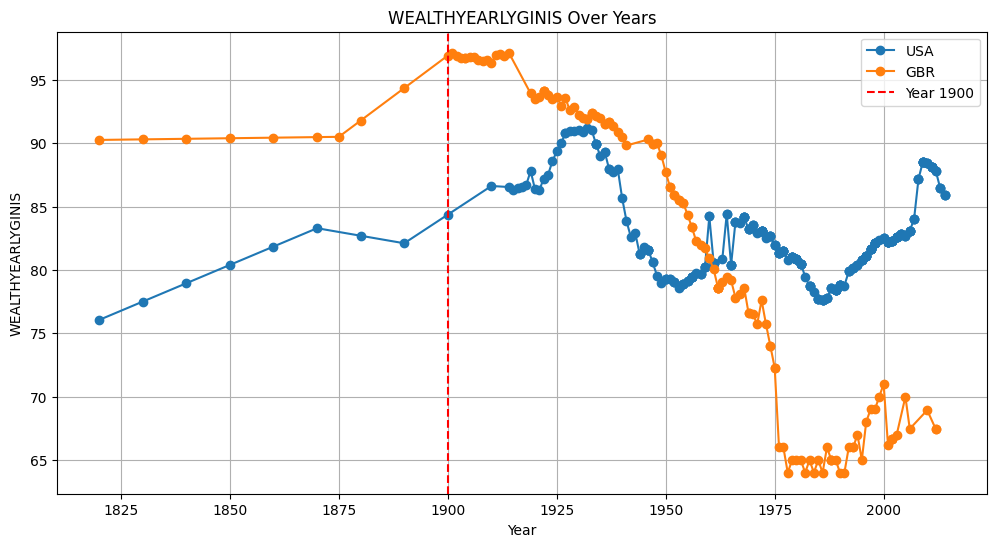

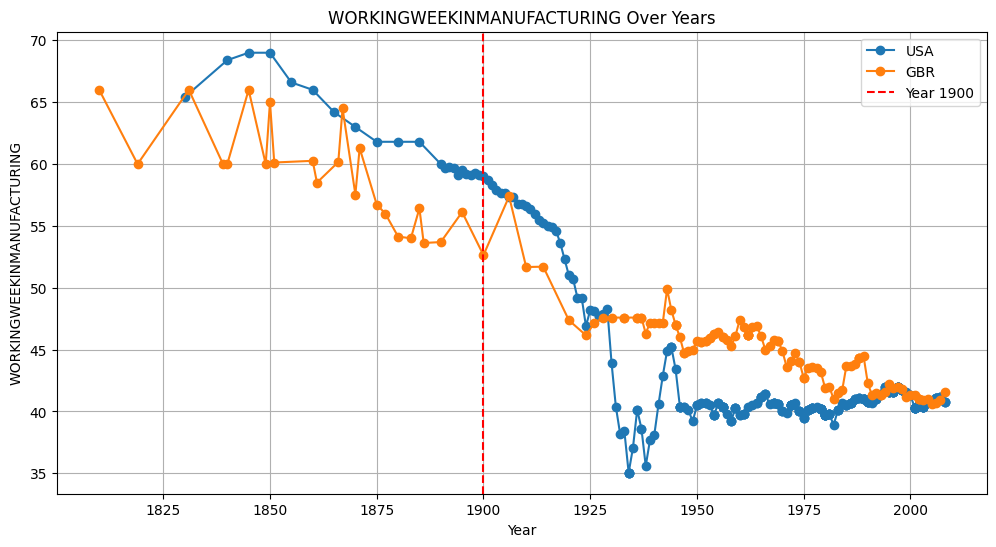

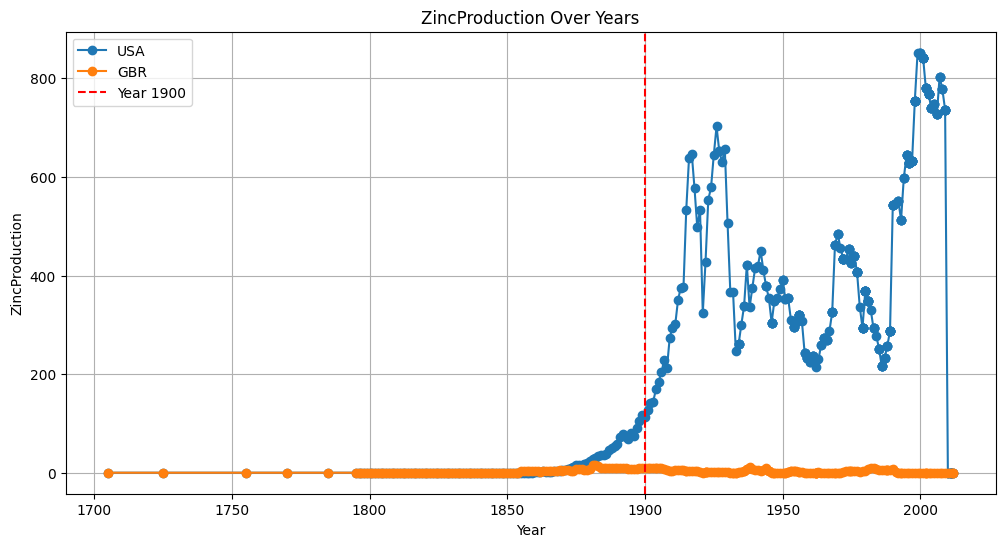

In [5]:
# merged_df = merged_df[(merged_df["YEAR"] < 1950) & (merged_df["YEAR"] > 1800)]

import matplotlib.pyplot as plt

for column in sorted(merged_df.columns):
    if column not in ['YEAR', 'COUNTRYCODE']:  # Exclude non-numeric columns
        plt.figure(figsize=(12, 6))
        for country in SELECTED_COUNTRIES:
            country_data = merged_df[merged_df['COUNTRYCODE'] == country].dropna(subset=[column])
            plt.plot(country_data['YEAR'], country_data[column], label=country, marker='o')
        plt.title(f'{column} Over Years')
        plt.xlabel('Year')
        plt.axvline(x=1900, color='red', linestyle='--', label='Year 1900')
        plt.ylabel(column)
        plt.legend()
        plt.grid()
        plt.show()


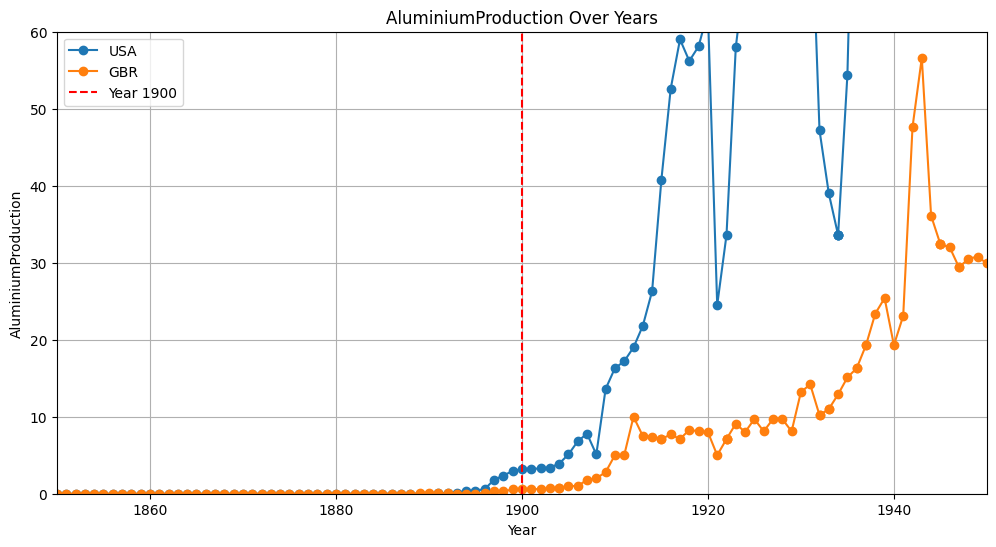

In [13]:
plt.figure(figsize=(12, 6))
for country in SELECTED_COUNTRIES:
    country_data = merged_df[merged_df['COUNTRYCODE'] == country].dropna(subset=['AluminiumProduction'])
    plt.plot(country_data['YEAR'], country_data['AluminiumProduction'], label=country, marker='o')
plt.title('AluminiumProduction Over Years')
plt.xlabel('Year')
plt.ylabel('AluminiumProduction')
plt.axvline(x=1900, color='red', linestyle='--', label='Year 1900')
plt.ylim(0, 60)
plt.xlim(1850,1950)
plt.legend()
plt.grid()
plt.show()

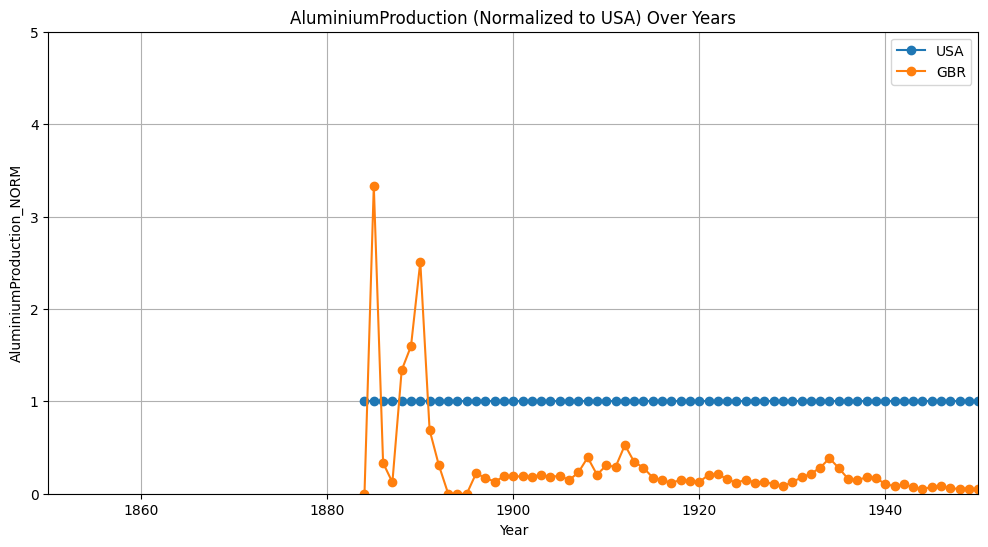

In [14]:
from scripts.normalize_to_country import norm_value

column = "AluminiumProduction"
df_norm = norm_value(merged_df, "USA", column)
plt.figure(figsize=(12, 6))
for country in SELECTED_COUNTRIES:
    country_data = df_norm[df_norm['COUNTRYCODE'] == country].dropna(subset=[f"{column}_NORM"])
    plt.plot(country_data['YEAR'], country_data[f"{column}_NORM"], label=country, marker='o')
plt.title(f'{column} (Normalized to USA) Over Years')
plt.xlabel('Year')
plt.ylabel(f"{column}_NORM")
plt.ylim(0, 5)
plt.xlim(1850,1950)

plt.legend()
plt.grid()
plt.show()